In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns   




In [3]:
df=pd.read_csv('data/train_sample_1M.csv')
df.head()

date_time  site_name  posa_continent  user_location_country   
0  2014-07-16 10:02:58          2               3                     66  \
1  2013-06-15 15:38:05         30               4                    195   
2  2014-11-23 17:06:12         30               4                    195   
3  2014-01-08 13:58:04          2               3                     66   
4  2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt   
0      501          0           0  ...                  0           1  \
1     1048          0           1  ...                  0           1   
2     1048          0           0  ...                  0           1   
3     1482          0           1  ...                  0           2   
4     1482          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt   
0                8267                         1           0    1  \
1                1385                         1           1    1   
2                8803                         1           0    1   
3               12009                         1           0    1   
4               28494                         6           0    4   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           675             10  
1                0            185           185             58  
2                3            151            69              6  
3                2             50           680             95  
4                2             50           680             77  

[5 rows x 24 columns]

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_time                  1000000 non-null  object 
 1   site_name                  1000000 non-null  int64  
 2   posa_continent             1000000 non-null  int64  
 3   user_location_country      1000000 non-null  int64  
 4   user_location_region       1000000 non-null  int64  
 5   user_location_city         1000000 non-null  int64  
 6   orig_destination_distance  641506 non-null   float64
 7   user_id                    1000000 non-null  int64  
 8   is_mobile                  1000000 non-null  int64  
 9   is_package                 1000000 non-null  int64  
 10  channel                    1000000 non-null  int64  
 11  srch_ci                    998731 non-null   object 
 12  srch_co                    998731 non-null   object 
 13  srch_adults_c

In [27]:
df.describe()

site_name  posa_continent  user_location_country   
count  1000000.000000  1000000.000000         1000000.000000  \
mean         9.792035        2.680957              86.167482   
std         11.959417        0.747921              59.312672   
min          2.000000        0.000000               0.000000   
25%          2.000000        3.000000              66.000000   
50%          2.000000        3.000000              66.000000   
75%         14.000000        3.000000              70.000000   
max         53.000000        4.000000             239.000000   

       user_location_region  user_location_city  orig_destination_distance   
count        1000000.000000      1000000.000000              641506.000000  \
mean             308.555305        27728.001102                1974.580694   
std              208.756876        16778.531858                2236.605335   
min                0.000000            0.000000                   0.005600   
25%              174.000000        12957.000000                 313.193900   
50%              314.000000        27655.000000                1145.605050   
75%              385.000000        42396.000000                2555.606125   
max             1027.000000        56507.000000               11759.197400   

            user_id       is_mobile      is_package         channel  ...   
count  1.000000e+06  1000000.000000  1000000.000000  1000000.000000  ...  \
mean   6.042228e+05        0.134357        0.248900        5.868918  ...   
std    3.505542e+05        0.341036        0.432376        3.717340  ...   
min    6.000000e+00        0.000000        0.000000        0.000000  ...   
25%    2.986710e+05        0.000000        0.000000        2.000000  ...   
50%    6.038945e+05        0.000000        0.000000        9.000000  ...   
75%    9.094600e+05        0.000000        0.000000        9.000000  ...   
max    1.198783e+06        1.000000        1.000000       10.000000  ...   

       srch_children_cnt     srch_rm_cnt  srch_destination_id   
count     1000000.000000  1000000.000000       1000000.000000  \
mean            0.329760        1.112528         14434.498238   
std             0.728076        0.460171         11056.039357   
min             0.000000        0.000000             1.000000   
25%             0.000000        1.000000          8267.000000   
50%             0.000000        1.000000          9147.000000   
75%             0.000000        1.000000         18790.000000   
max             9.000000        8.000000         65102.000000   

       srch_destination_type_id     is_booking             cnt   
count            1000000.000000  1000000.00000  1000000.000000  \
mean                   2.581288        0.07945        1.483279   
std                    2.152604        0.27044        1.214908   
min                    1.000000        0.00000        1.000000   
25%                    1.000000        0.00000        1.000000   
50%                    1.000000        0.00000        1.000000   
75%                    5.000000        0.00000        2.000000   
max                    9.000000        1.00000       68.000000   

       hotel_continent   hotel_country    hotel_market   hotel_cluster  
count   1000000.000000  1000000.000000  1000000.000000  1000000.000000  
mean          3.158870       81.316761      600.139665       49.821733  
std           1.623622       56.168875      511.679356       28.924311  
min           0.000000        0.000000        0.000000        0.000000  
25%           2.000000       50.000000      159.000000       25.000000  
50%           2.000000       50.000000      592.000000       49.000000  
75%           4.000000      106.000000      701.000000       73.000000  
max           6.000000      212.000000     2117.000000       99.000000  

[8 rows x 21 columns]

In [28]:
df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    358494
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                        1269
srch_co                        1269
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
dtype: int64

In [29]:
df['date_time'].head()

0    2014-07-16 10:02:58
1    2013-06-15 15:38:05
2    2014-11-23 17:06:12
3    2014-01-08 13:58:04
4    2014-01-08 14:15:40
Name: date_time, dtype: object

In [30]:
df['date_time'].value_counts()

date_time
2014-08-01 09:49:48    3
2014-08-21 20:02:56    3
2014-09-17 16:45:14    3
2014-07-17 11:54:16    3
2014-03-26 20:57:12    3
                      ..
2013-08-30 19:26:07    1
2013-08-30 19:28:25    1
2013-09-06 12:52:03    1
2014-01-12 10:30:43    1
2014-07-15 10:37:42    1
Name: count, Length: 987840, dtype: int64

In [31]:
df.duplicated().sum() 

1

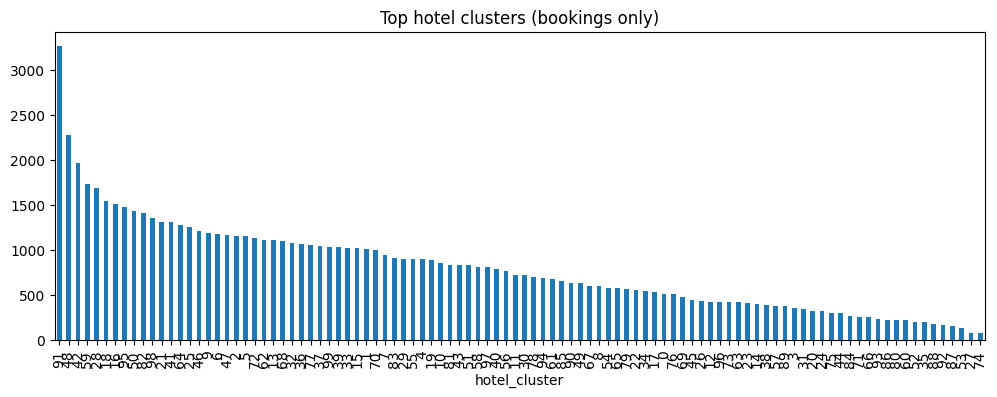

In [32]:
bookings = df[df['is_booking']==1]
cluster_counts = bookings['hotel_cluster'].value_counts()
cluster_counts.head(20)
cluster_counts.plot(kind='bar', figsize=(12,4))
plt.title('Top hotel clusters (bookings only)')
plt.show()

In [78]:
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Now you can extract the year
df['search_year'] = df['date_time'].dt.year

Text(0.5, 1.0, 'Number of searches per year')

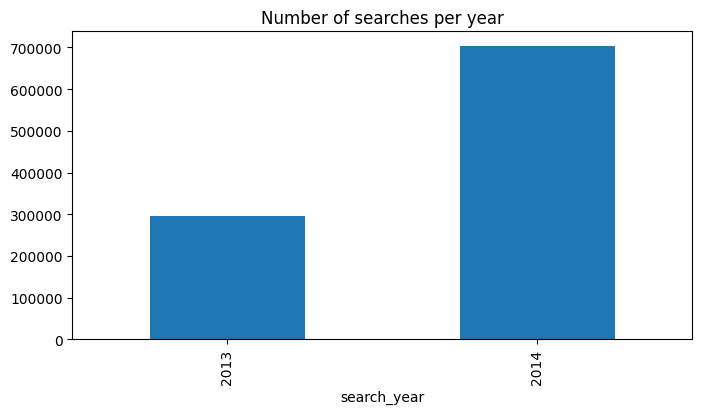

In [79]:
df['search_year'].value_counts().sort_index().plot(kind='bar', figsize=(8,4))
plt.title('Number of searches per year')    

In [80]:
df['search_month'] = df['date_time'].dt.month
df['search_dayofweek'] = df['date_time'].dt.dayofweek
df['search_hour'] = df['date_time'].dt.hour


In [36]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  is_booking cnt hotel_continent   
0      501          0           0  ...           0   1               2  \
1     1048          0           1  ...           1   1               0   
2     1048          0           0  ...           0   1               3   
3     1482          0           1  ...           0   1               2   
4     1482          0           0  ...           0   4               2   

   hotel_country  hotel_market  hotel_cluster  search_year  search_month   
0             50           675             10         2014             7  \
1            185           185             58         2013             6   
2            151            69              6         2014            11   
3             50           680             95         2014             1   
4             50           680             77         2014             1   

   search_dayofweek  search_hour  
0                 2           10  
1                 5           15  
2                 6           17  
3                 2           13  
4                 2           14  

[5 rows x 28 columns]

In [81]:
df['user_id'].value_counts().head(10)

user_id
89803      27
1051608    27
875420     21
804774     21
282110     21
859018     20
273113     20
242840     20
621179     20
1187360    20
Name: count, dtype: int64

In [82]:
df['srch_ci']   = pd.to_datetime(df['srch_ci'], errors='coerce')
df['lead_time'] = (df['srch_ci'] - df['date_time']).dt.days


In [83]:
df['srch_co'] = pd.to_datetime(df['srch_co'], errors='coerce')
df['stay_nights'] = (df['srch_co'] - df['srch_ci']).dt.days

In [84]:
# quick checks
print(df[['lead_time','stay_nights']].describe())
# negative/absurd values
print('negative lead_time:', (df['lead_time'] < 0).sum())
print('long stays >365:', (df['stay_nights'] > 365).sum())

           lead_time    stay_nights
count  998731.000000  998731.000000
mean       53.778711       3.364032
std        65.585894       3.280389
min      -349.000000    -360.000000
25%         8.000000       1.000000
50%        29.000000       3.000000
75%        74.000000       4.000000
max       497.000000     516.000000
negative lead_time: 30058
long stays >365: 3


In [54]:

df.duplicated().sum()

1

In [85]:
num_long_stays = (df['stay_nights'] > 365).sum()
print("Number of rows where stay_nights > 365:", num_long_stays)

Number of rows where stay_nights > 365: 3


In [86]:
num_negative_stay_nights = (df['stay_nights'] < 0).sum()
print("Number of rows where stay_nights < 0:", num_negative_stay_nights)

Number of rows where stay_nights < 0: 27


In [52]:
df_stay_neg.head()

date_time  site_name  posa_continent  user_location_country   
53     2014-12-03 08:08:52         11               3                    205  \
129835 2014-08-27 12:31:44         11               3                    205   
150723 2014-09-26 16:11:55         13               1                     46   
234452 2014-10-03 07:34:47         11               3                    205   
274938 2014-10-23 09:35:40         13               1                     46   

        user_location_region  user_location_city  orig_destination_distance   
53                       354               41495                  5999.8215  \
129835                   339               36801                        NaN   
150723                   336               13318                  1904.5645   
234452                   354                9189                        NaN   
274938                   408               29175                        NaN   

        user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
53         7899          0           0  ...                5           100  \
129835   616387          0           1  ...                6            31   
150723   261972          0           1  ...                6           170   
234452   817631          0           0  ...                6           144   
274938   247884          0           1  ...                6           105   

       hotel_market  hotel_cluster  search_year  search_month   
53              796             36         2014            12  \
129835          155             18         2014             8   
150723         1894             44         2014             9   
234452           24             25         2014            10   
274938          809             23         2014            10   

        search_dayofweek  search_hour  lead_time  stay_nights  
53                     2            8      341.0        -56.0  
129835                 2           12       73.0        -55.0  
150723                 4           16       31.0        -47.0  
234452                 4            7       27.0       -142.0  
274938                 3            9        6.0       -261.0  

[5 rows x 30 columns]

In [45]:
df_neg=df[df['stay_nights']<0]
df_neg.head().sort_values(by='stay_nights')

date_time  site_name  posa_continent  user_location_country   
274938 2014-10-23 09:35:40         13               1                     46  \
234452 2014-10-03 07:34:47         11               3                    205   
53     2014-12-03 08:08:52         11               3                    205   
129835 2014-08-27 12:31:44         11               3                    205   
150723 2014-09-26 16:11:55         13               1                     46   

        user_location_region  user_location_city  orig_destination_distance   
274938                   408               29175                        NaN  \
234452                   354                9189                        NaN   
53                       354               41495                  5999.8215   
129835                   339               36801                        NaN   
150723                   336               13318                  1904.5645   

        user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
274938   247884          0           1  ...                6           105  \
234452   817631          0           0  ...                6           144   
53         7899          0           0  ...                5           100   
129835   616387          0           1  ...                6            31   
150723   261972          0           1  ...                6           170   

       hotel_market  hotel_cluster  search_year  search_month   
274938          809             23         2014            10  \
234452           24             25         2014            10   
53              796             36         2014            12   
129835          155             18         2014             8   
150723         1894             44         2014             9   

        search_dayofweek  search_hour  lead_time  stay_nights  
274938                 3            9        6.0       -261.0  
234452                 4            7       27.0       -142.0  
53                     2            8      341.0        -56.0  
129835                 2           12       73.0        -55.0  
150723                 4           16       31.0        -47.0  

[5 rows x 30 columns]

In [87]:
df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    358494
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                        1269
srch_co                        1269
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
search_year                       0
search_month                      0
search_dayofweek                  0
search_hour                 

In [40]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
0      501          0           0  ...                2            50  \
1     1048          0           1  ...                0           185   
2     1048          0           0  ...                3           151   
3     1482          0           1  ...                2            50   
4     1482          0           0  ...                2            50   

  hotel_market  hotel_cluster  search_year  search_month  search_dayofweek   
0          675             10         2014             7                 2  \
1          185             58         2013             6                 5   
2           69              6         2014            11                 6   
3          680             95         2014             1                 2   
4          680             77         2014             1                 2   

   search_hour  lead_time  stay_nights  
0           10       15.0          1.0  
1           15       82.0          8.0  
2           17      214.0          2.0  
3           13       43.0          2.0  
4           14       44.0          5.0  

[5 rows x 30 columns]

In [89]:
df = df.drop_duplicates().reset_index(drop=True)

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  999999 non-null  datetime64[ns]
 1   site_name                  999999 non-null  int64         
 2   posa_continent             999999 non-null  int64         
 3   user_location_country      999999 non-null  int64         
 4   user_location_region       999999 non-null  int64         
 5   user_location_city         999999 non-null  int64         
 6   orig_destination_distance  641506 non-null  float64       
 7   user_id                    999999 non-null  int64         
 8   is_mobile                  999999 non-null  int64         
 9   is_package                 999999 non-null  int64         
 10  channel                    999999 non-null  int64         
 11  srch_ci                    998730 non-null  datetime

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999999 entries, 0 to 999998
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  999999 non-null  datetime64[ns]
 1   site_name                  999999 non-null  int64         
 2   posa_continent             999999 non-null  int64         
 3   user_location_country      999999 non-null  int64         
 4   user_location_region       999999 non-null  int64         
 5   user_location_city         999999 non-null  int64         
 6   orig_destination_distance  641506 non-null  float64       
 7   user_id                    999999 non-null  int64         
 8   is_mobile                  999999 non-null  int64         
 9   is_package                 999999 non-null  int64         
 10  channel                    999999 non-null  int64         
 11  srch_ci                    998730 non-null  datetime

In [91]:
df = df[(df['stay_nights'] > 0) & (df['stay_nights'] <= 365)]

In [100]:
df=df[df['lead_time'] >= 0]

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 964936 entries, 0 to 999998
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  964936 non-null  datetime64[ns]
 1   site_name                  964936 non-null  int64         
 2   posa_continent             964936 non-null  int64         
 3   user_location_country      964936 non-null  int64         
 4   user_location_region       964936 non-null  int64         
 5   user_location_city         964936 non-null  int64         
 6   orig_destination_distance  615975 non-null  float64       
 7   user_id                    964936 non-null  int64         
 8   is_mobile                  964936 non-null  int64         
 9   is_package                 964936 non-null  int64         
 10  channel                    964936 non-null  int64         
 11  srch_ci                    964936 non-null  datetime64[ns

# Univariate Analysis

Text(0.5, 1.0, 'Distribution of stay_nights')

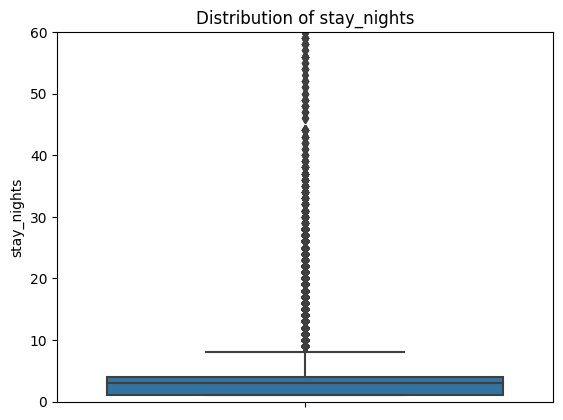

In [107]:
fig, figsize = (10,4)
sns.boxplot(df, y='stay_nights')
plt.ylim(0, 60)
plt.title('Distribution of stay_nights')

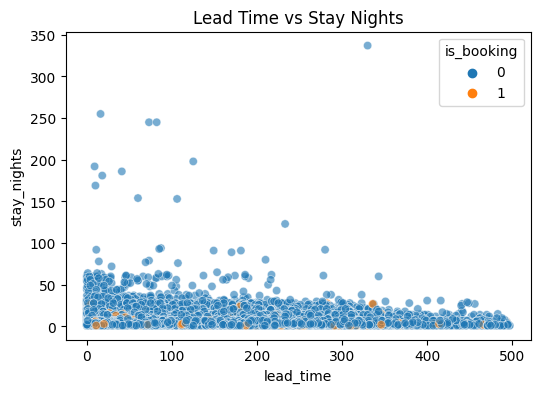

In [108]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='lead_time', y='stay_nights', hue='is_booking', alpha=0.6)
plt.title("Lead Time vs Stay Nights")
plt.show()

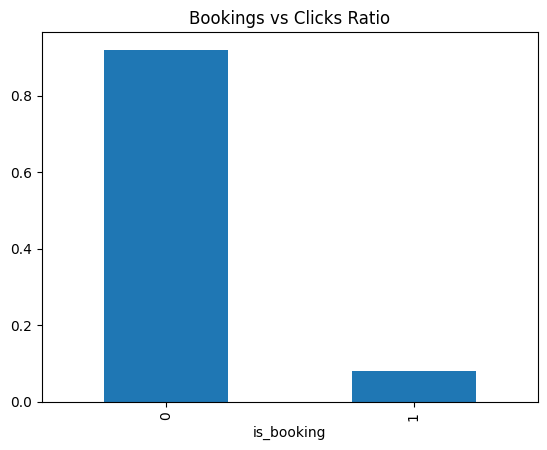

In [95]:
df['is_booking'].value_counts(normalize=True).plot(kind='bar')
plt.title("Bookings vs Clicks Ratio")
plt.show()

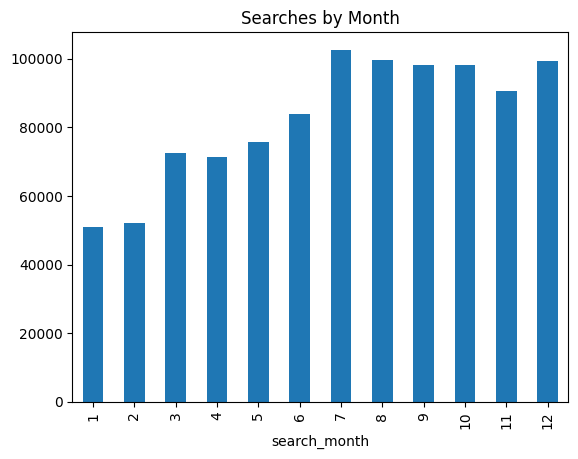

In [96]:
df['search_month'].value_counts().sort_index().plot(kind='bar')
plt.title("Searches by Month")
plt.show()

In [64]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
0      501          0           0  ...                2            50  \
1     1048          0           1  ...                0           185   
2     1048          0           0  ...                3           151   
3     1482          0           1  ...                2            50   
4     1482          0           0  ...                2            50   

  hotel_market  hotel_cluster  search_year  search_month  search_dayofweek   
0          675             10         2014             7                 2  \
1          185             58         2013             6                 5   
2           69              6         2014            11                 6   
3          680             95         2014             1                 2   
4          680             77         2014             1                 2   

   search_hour  lead_time  stay_nights  
0           10       15.0          1.0  
1           15       82.0          8.0  
2           17      214.0          2.0  
3           13       43.0          2.0  
4           14       44.0          5.0  

[5 rows x 30 columns]

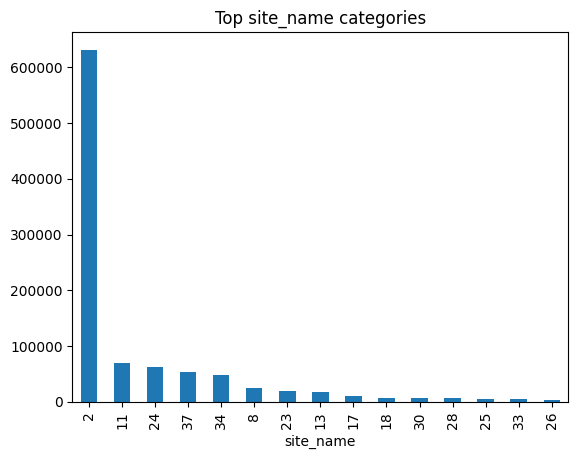

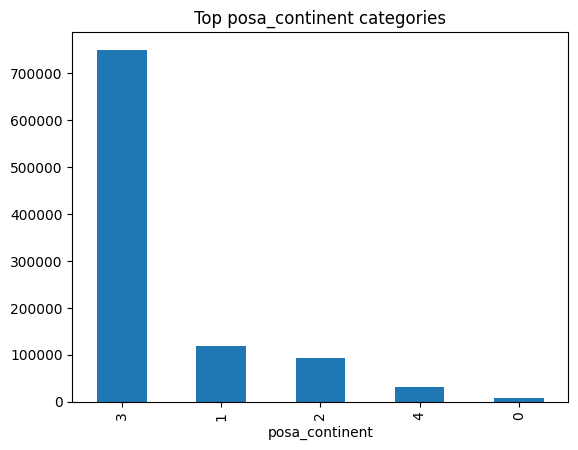

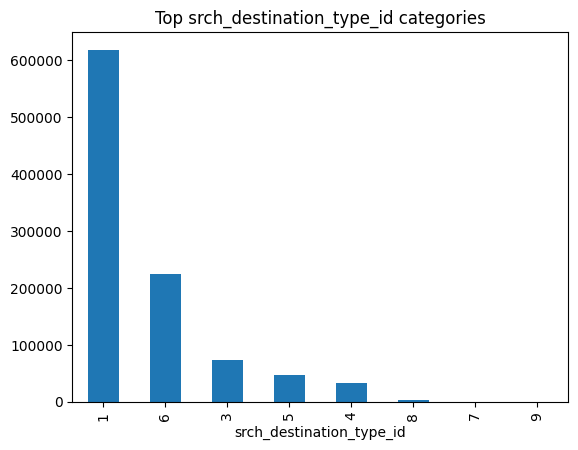

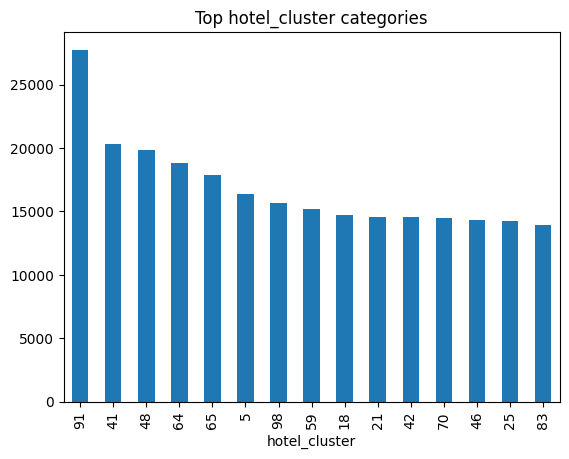

In [63]:
for col in ['site_name','posa_continent','srch_destination_type_id','hotel_cluster']:
    df[col].value_counts().head(15).plot(kind='bar')
    plt.title(f"Top {col} categories")
    plt.show()


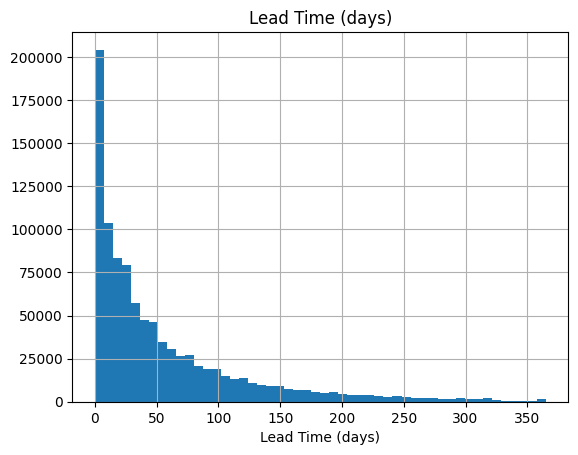

In [112]:
df['lead_time'].clip(0,365).hist(bins=50)
plt.xlabel("Lead Time (days)")
plt.title("Lead Time (days)")
plt.show()

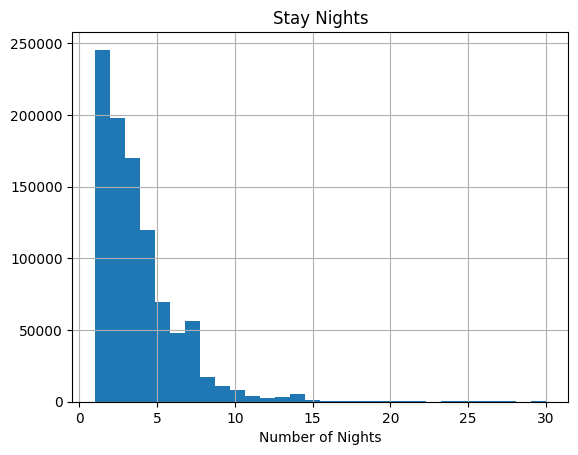

In [110]:

df['stay_nights'].clip(0,30).hist(bins=30)
plt.xlabel("Number of Nights")
plt.title("Stay Nights")
plt.show()

In [114]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
0      501          0           0  ...                2            50  \
1     1048          0           1  ...                0           185   
2     1048          0           0  ...                3           151   
3     1482          0           1  ...                2            50   
4     1482          0           0  ...                2            50   

  hotel_market  hotel_cluster  search_year  search_month  search_dayofweek   
0          675             10         2014             7                 2  \
1          185             58         2013             6                 5   
2           69              6         2014            11                 6   
3          680             95         2014             1                 2   
4          680             77         2014             1                 2   

   search_hour  lead_time  stay_nights  
0           10       15.0          1.0  
1           15       82.0          8.0  
2           17      214.0          2.0  
3           13       43.0          2.0  
4           14       44.0          5.0  

[5 rows x 30 columns]

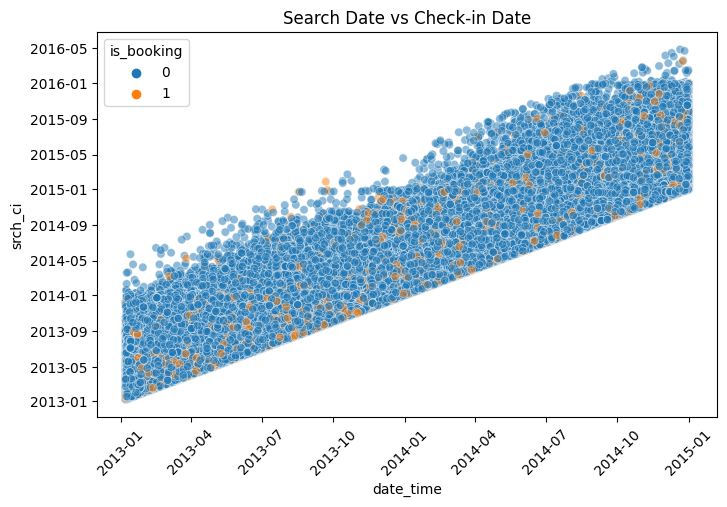

In [116]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='date_time', y='srch_ci', hue='is_booking', alpha=0.5)
plt.title("Search Date vs Check-in Date")
plt.xticks(rotation=45)
plt.show()

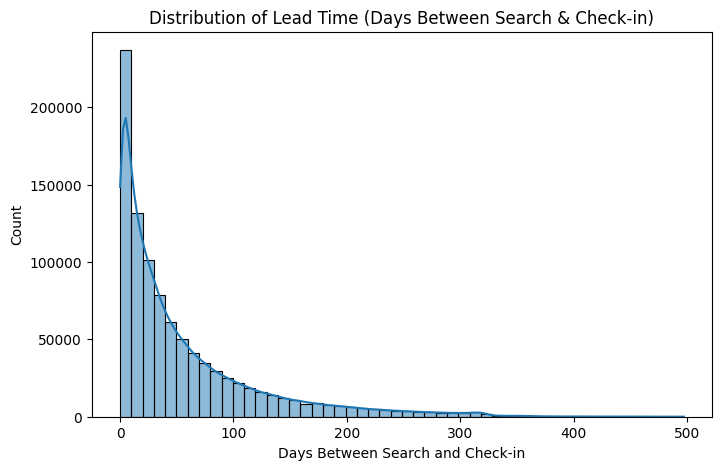

In [117]:
plt.figure(figsize=(8,5))
sns.histplot(df['lead_time'], bins=50, kde=True)
plt.title("Distribution of Lead Time (Days Between Search & Check-in)")
plt.xlabel("Days Between Search and Check-in")
plt.ylabel("Count")
plt.show()

In [118]:
df['lead_time'].describe()

count    964936.000000
mean         55.407228
std          65.795893
min           0.000000
25%          10.000000
50%          31.000000
75%          76.000000
max         497.000000
Name: lead_time, dtype: float64

In [119]:
df.isna().sum()

date_time                         0
site_name                         0
posa_continent                    0
user_location_country             0
user_location_region              0
user_location_city                0
orig_destination_distance    348961
user_id                           0
is_mobile                         0
is_package                        0
channel                           0
srch_ci                           0
srch_co                           0
srch_adults_cnt                   0
srch_children_cnt                 0
srch_rm_cnt                       0
srch_destination_id               0
srch_destination_type_id          0
is_booking                        0
cnt                               0
hotel_continent                   0
hotel_country                     0
hotel_market                      0
hotel_cluster                     0
search_year                       0
search_month                      0
search_dayofweek                  0
search_hour                 

# Bivariate

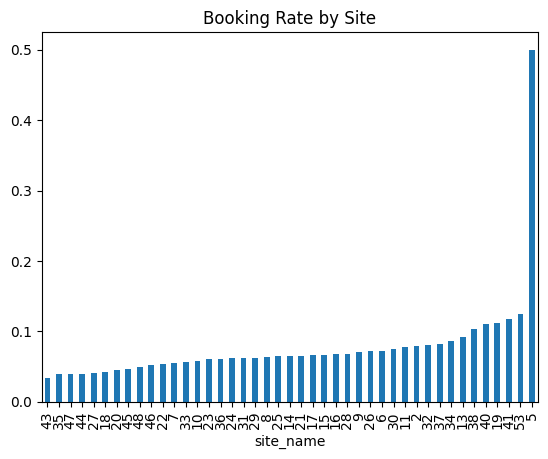

hotel_continent  hotel_continent  hotel_cluster
0                0                98               0.057244
                                  59               0.055830
                                  95               0.053004
2                2                91               0.066050
                                  48               0.042344
                                  42               0.036457
3                3                46               0.060606
                                  36               0.048980
                                  81               0.048609
4                4                65               0.112360
                                  66               0.048689
                                  52               0.039227
5                5                38               0.107463
                                  46               0.082090
                                  82               0.076119
6                6                82               0

In [120]:
bookings = df[df['is_booking']==1]

# Booking ratio by site
df.groupby('site_name')['is_booking'].mean().sort_values().plot(kind='bar')
plt.title("Booking Rate by Site")
plt.show()

# Top hotel clusters by continent
bookings.groupby('hotel_continent')['hotel_cluster'].value_counts(normalize=True).groupby(level=0).nlargest(3)


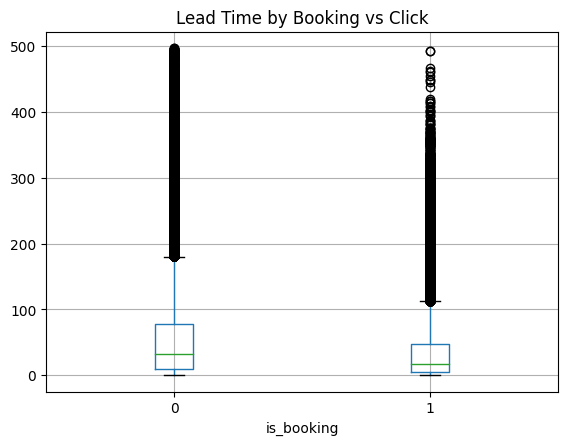

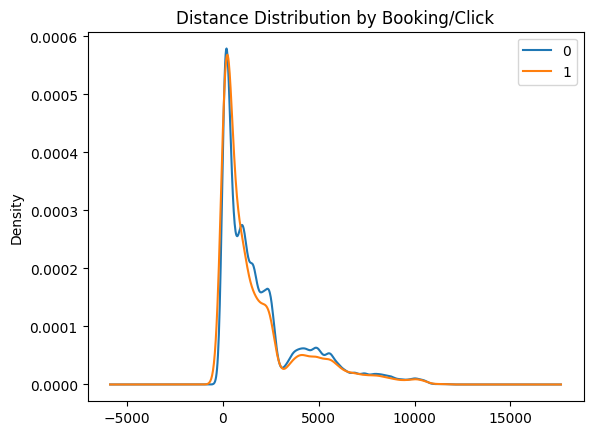

In [195]:
df.boxplot(column='lead_time', by='is_booking')
plt.title("Lead Time by Booking vs Click")
plt.suptitle("")
plt.show()

df.groupby('is_booking')['orig_destination_distance'].plot(kind='kde', legend=True)
plt.title("Distance Distribution by Booking/Click")
plt.show()


In [123]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
0      501          0           0  ...                2            50  \
1     1048          0           1  ...                0           185   
2     1048          0           0  ...                3           151   
3     1482          0           1  ...                2            50   
4     1482          0           0  ...                2            50   

  hotel_market  hotel_cluster  search_year  search_month  search_dayofweek   
0          675             10         2014             7                 2  \
1          185             58         2013             6                 5   
2           69              6         2014            11                 6   
3          680             95         2014             1                 2   
4          680             77         2014             1                 2   

   search_hour  lead_time  stay_nights  
0           10       15.0          1.0  
1           15       82.0          8.0  
2           17      214.0          2.0  
3           13       43.0          2.0  
4           14       44.0          5.0  

[5 rows x 30 columns]

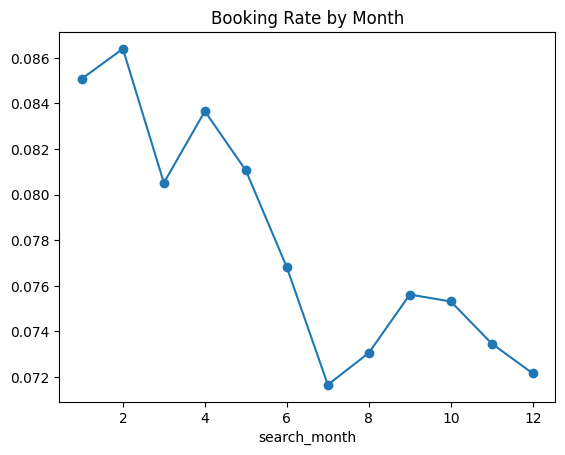

In [124]:
monthly = df.groupby('search_month')['is_booking'].mean()
monthly.plot(kind='line', marker='o')
plt.title("Booking Rate by Month")
plt.show()

# User Countries with highest bookings

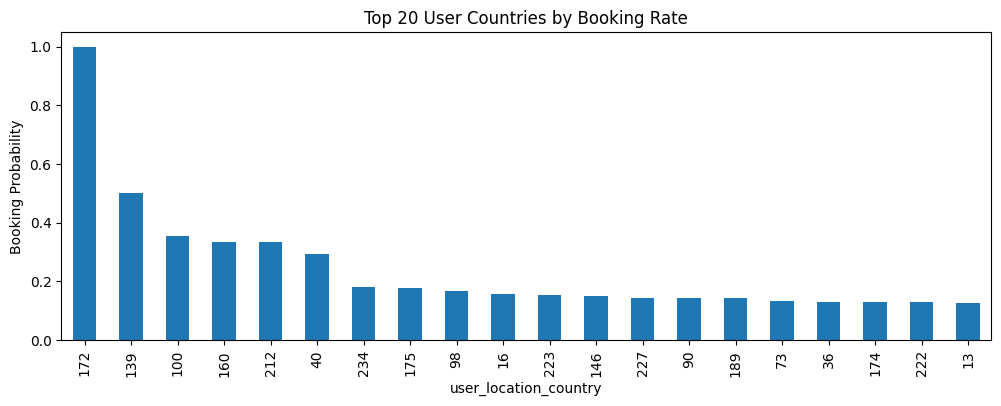

In [125]:
user_booking = df.groupby('user_location_country')['is_booking'].mean().sort_values(ascending=False).head(20)
user_booking.plot(kind='bar', figsize=(12,4))
plt.title("Top 20 User Countries by Booking Rate")
plt.ylabel("Booking Probability")
plt.show()


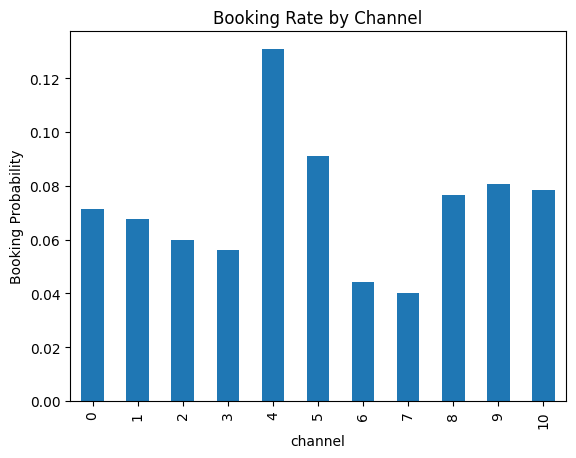

In [126]:
channel_booking = df.groupby('channel')['is_booking'].mean()
channel_booking.plot(kind='bar')
plt.title("Booking Rate by Channel")
plt.ylabel("Booking Probability")
plt.show()

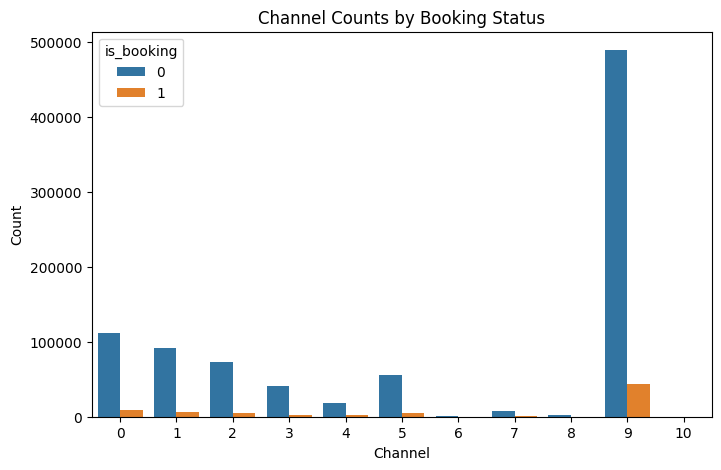

In [129]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='channel', hue='is_booking')
plt.title("Channel Counts by Booking Status")
plt.xlabel("Channel")
plt.ylabel("Count")
plt.show()

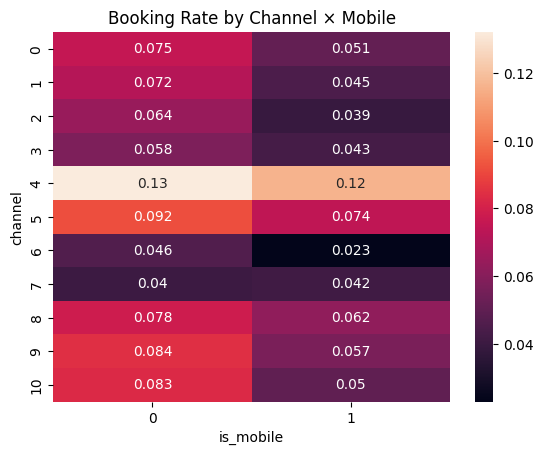

In [127]:
sns.heatmap(pd.crosstab(df['channel'], df['is_mobile'], values=df['is_booking'], aggfunc='mean'), annot=True)
plt.title("Booking Rate by Channel × Mobile")
plt.show()

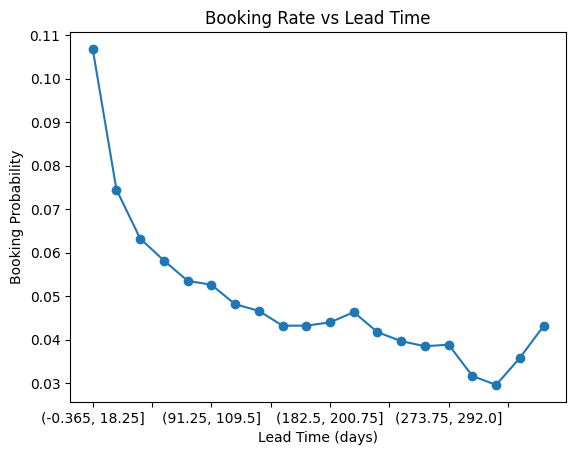

In [128]:
lead_bins = pd.cut(df['lead_time'].clip(0,365), bins=20)
lead_booking = df.groupby(lead_bins)['is_booking'].mean()
lead_booking.plot(kind='line', marker='o')
plt.title("Booking Rate vs Lead Time")
plt.xlabel("Lead Time (days)")
plt.ylabel("Booking Probability")
plt.show()

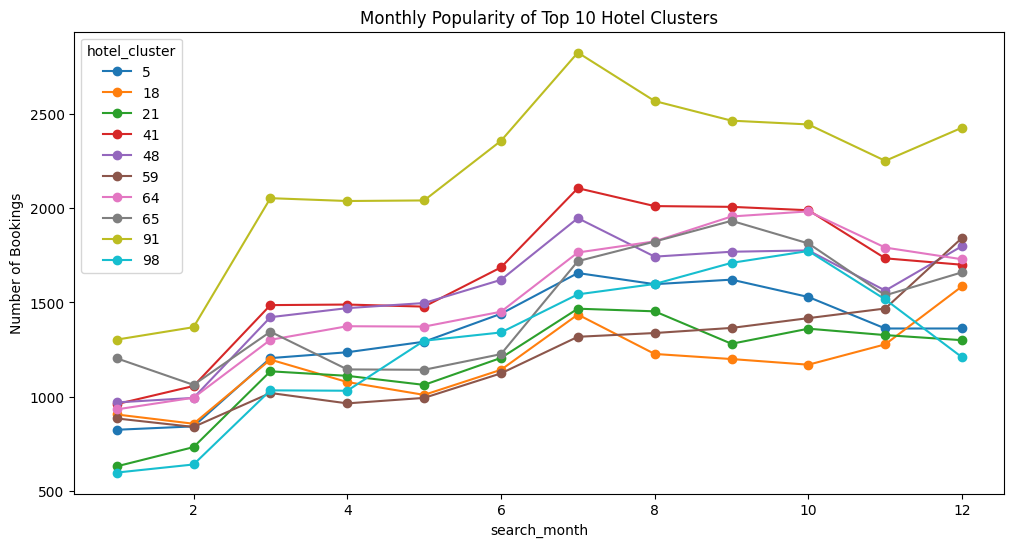

In [131]:
top_clusters = df['hotel_cluster'].value_counts().head(10).index
month_cluster = df[df['hotel_cluster'].isin(top_clusters)].groupby(['search_month','hotel_cluster']).size().unstack().fillna(0)
month_cluster.plot(kind='line', marker='o', figsize=(12,6))
plt.title("Monthly Popularity of Top 10 Hotel Clusters")
plt.ylabel("Number of Bookings")
plt.show()

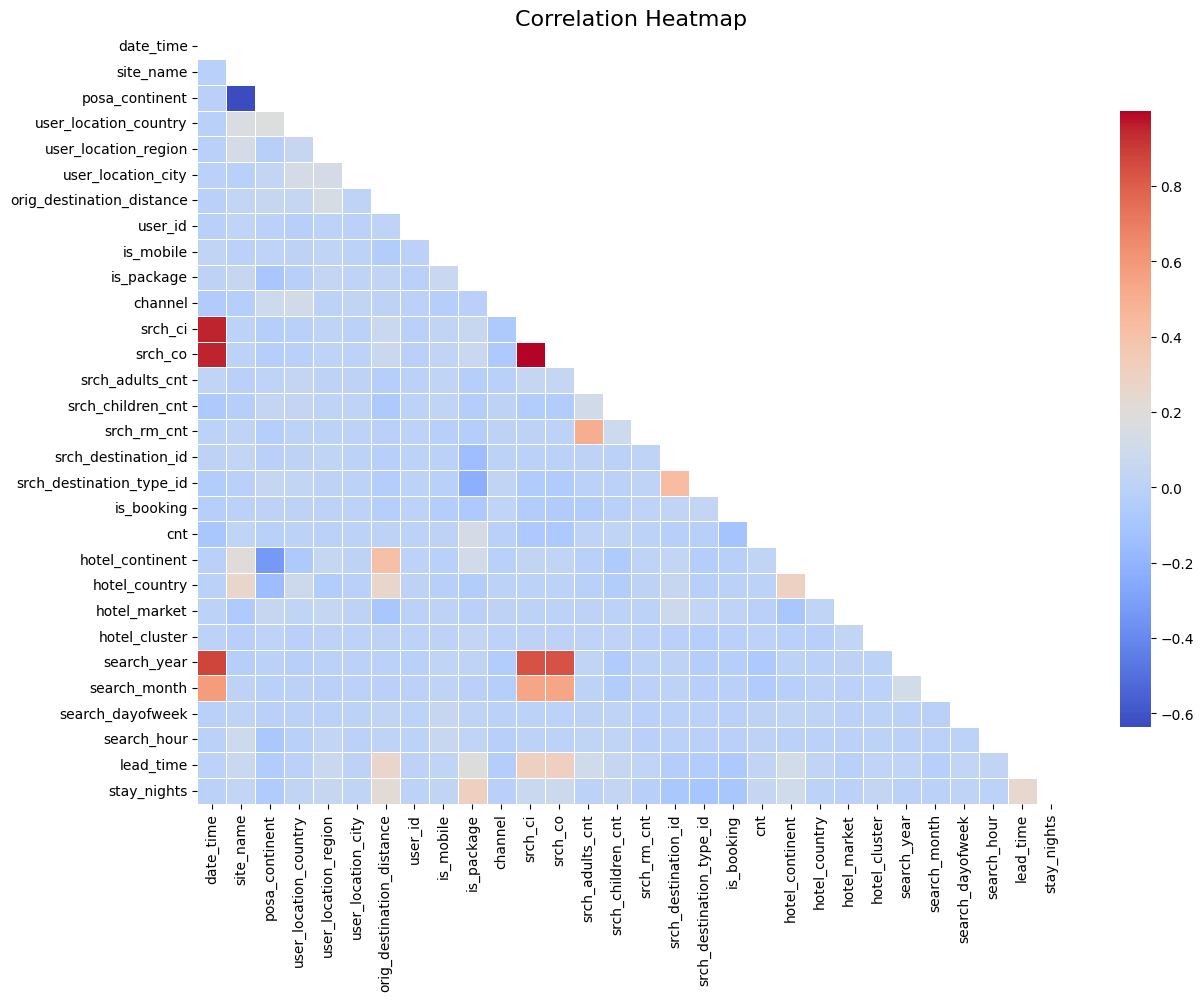

In [134]:
plt.figure(figsize=(14,10))  # make it bigger
corr = df.corr()

# mask upper triangle to avoid duplication
mask = np.triu(np.ones_like(corr, dtype=bool))

sns.heatmap(
    corr,
    mask=mask,
    cmap="coolwarm",
    annot=False,   # hide numbers for clarity
    cbar_kws={"shrink": 0.8}, 
    linewidths=0.5
)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


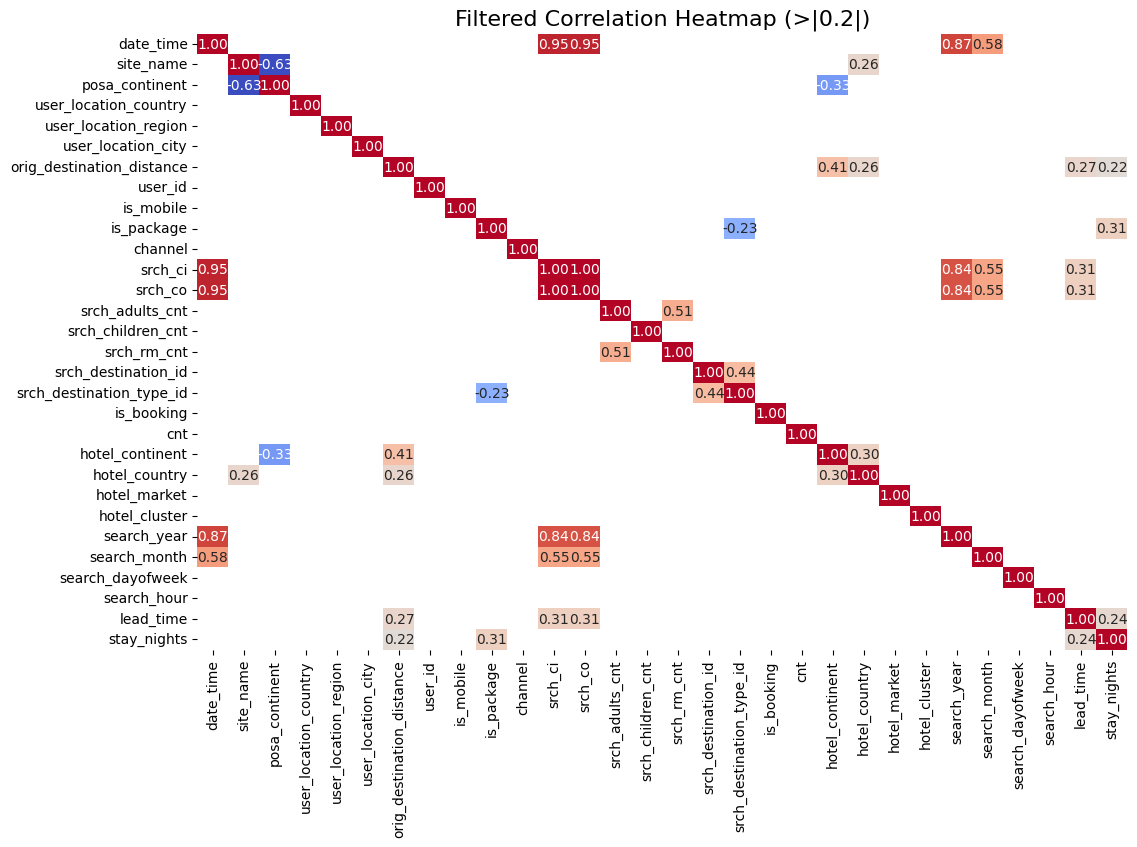

In [135]:
plt.figure(figsize=(12,8))
sns.heatmap(
    corr[(corr > 0.2) | (corr < -0.2)], 
    cmap="coolwarm", 
    annot=True, 
    fmt=".2f", 
    cbar=False
)
plt.title("Filtered Correlation Heatmap (>|0.2|)", fontsize=16)
plt.show()


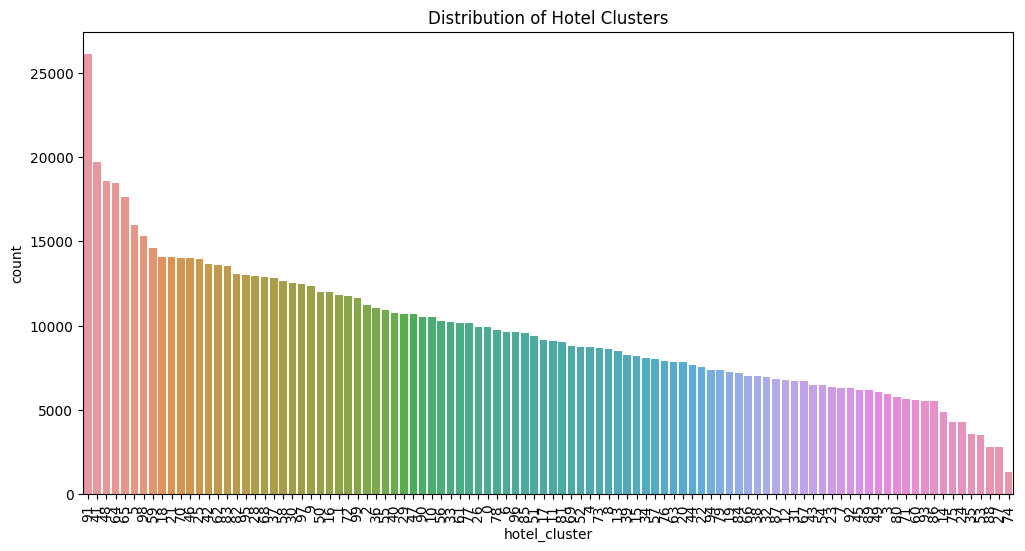

In [136]:
plt.figure(figsize=(12,6))
sns.countplot(x='hotel_cluster', data=df, order=df['hotel_cluster'].value_counts().index)
plt.title("Distribution of Hotel Clusters")
plt.xticks(rotation=90)
plt.show()

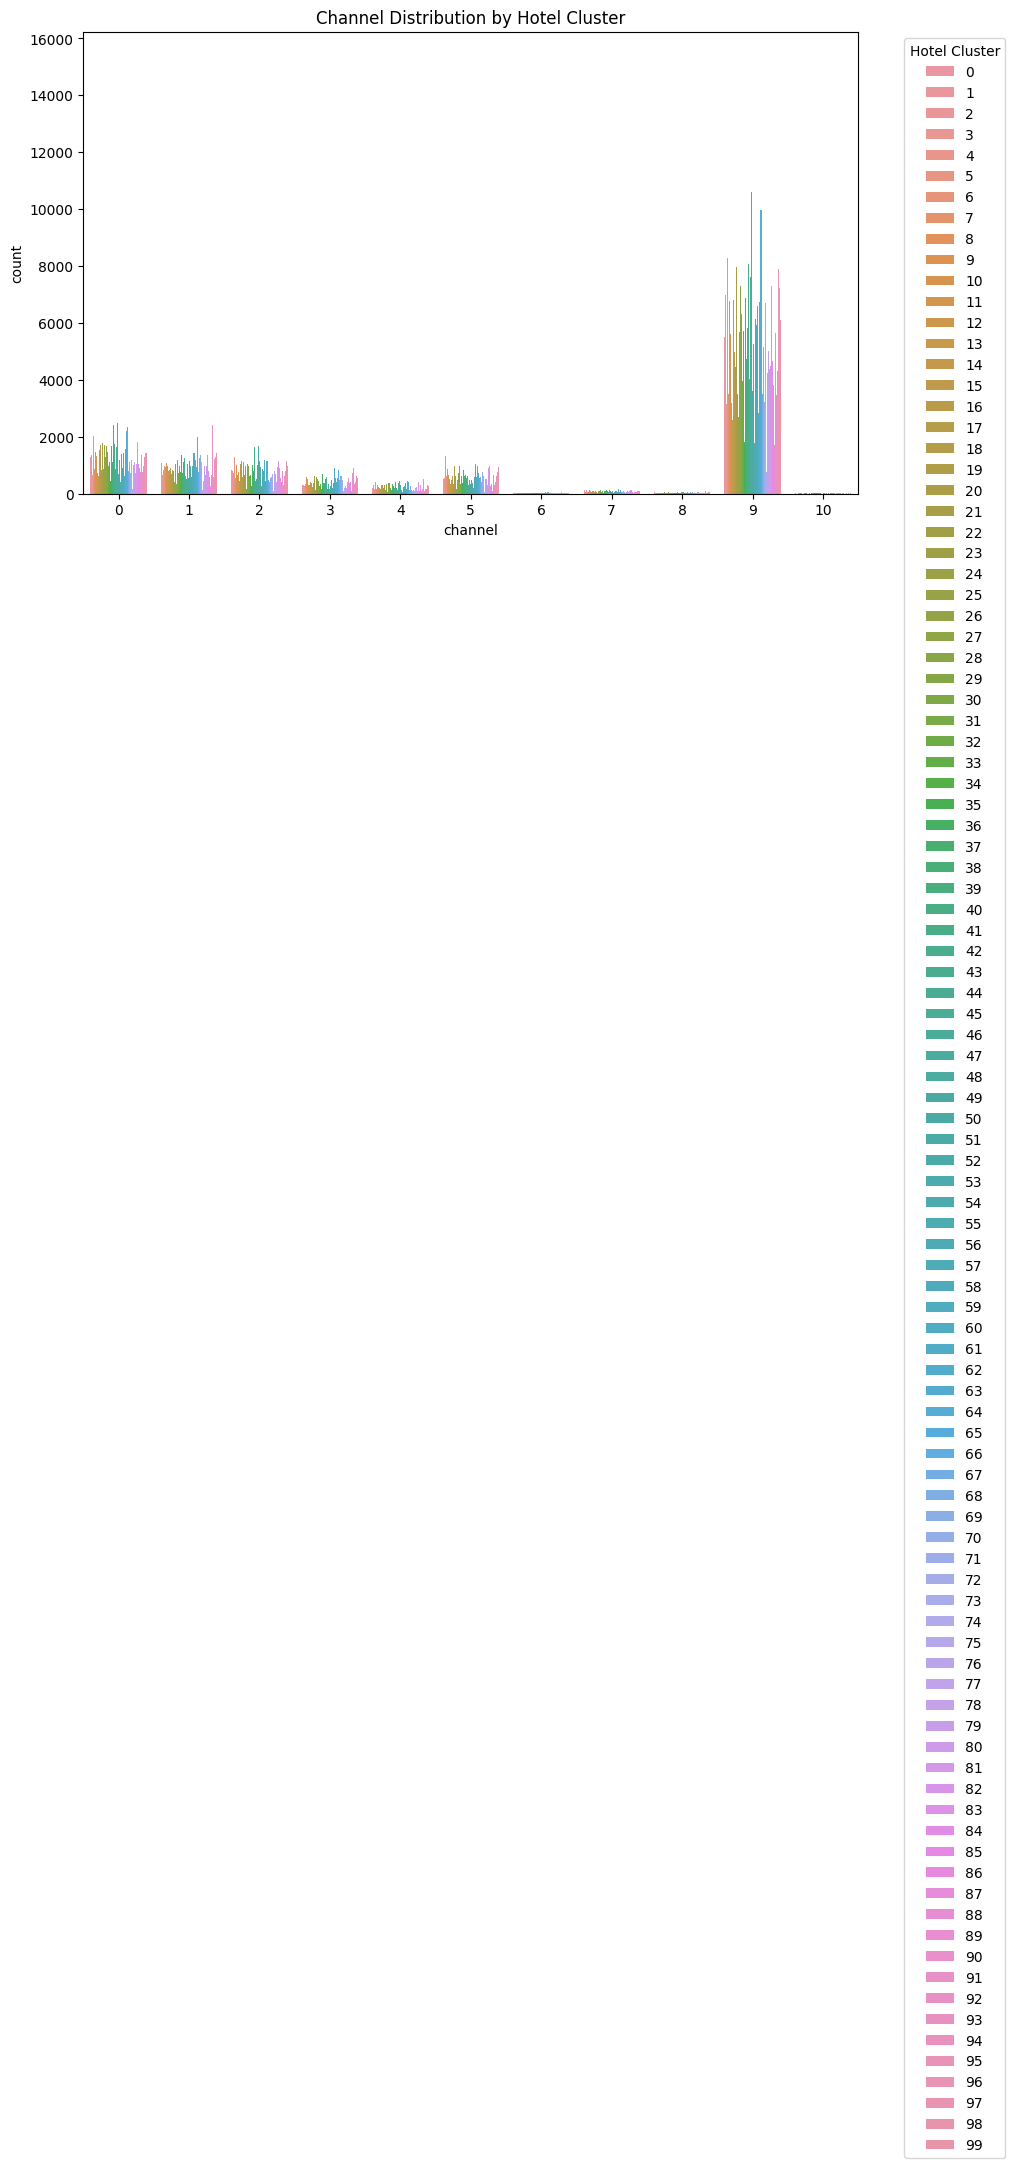

In [137]:
plt.figure(figsize=(10,6))
sns.countplot(x='channel', hue='hotel_cluster', data=df)
plt.title("Channel Distribution by Hotel Cluster")
plt.legend(title="Hotel Cluster", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


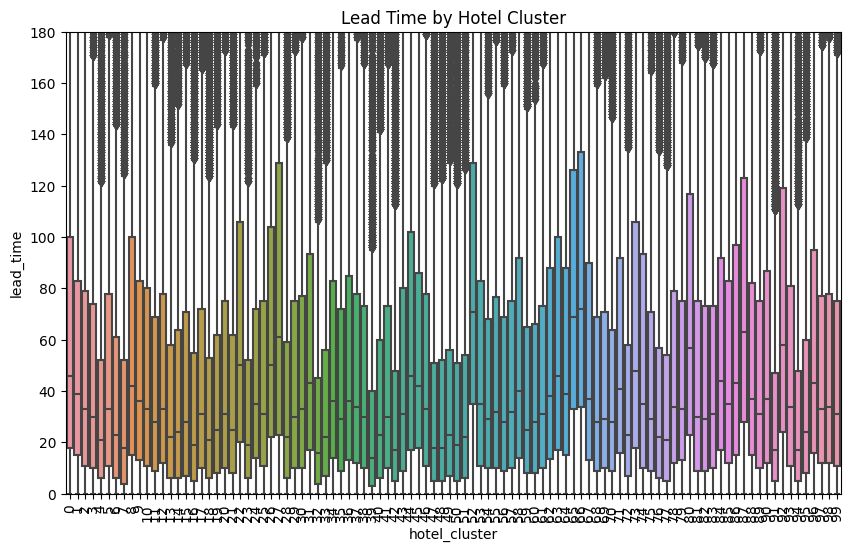

In [142]:
plt.figure(figsize=(10,6))
sns.boxplot(x='hotel_cluster', y='lead_time', data=df)
plt.title("Lead Time by Hotel Cluster")
plt.ylim(0, 180)
plt.xticks(rotation=90)
plt.show()

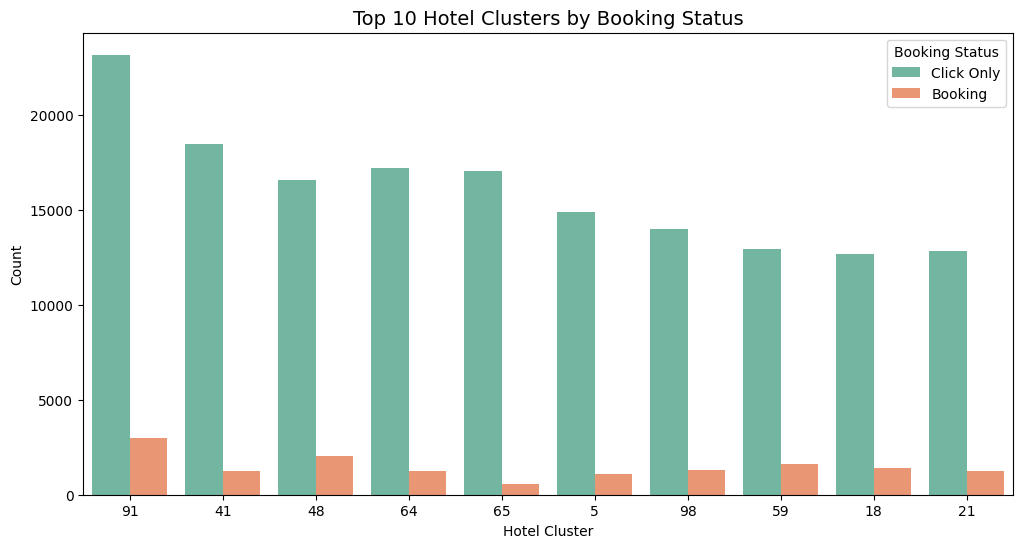

In [144]:
# Get top 10 hotel clusters by total occurrences
top_clusters = df['hotel_cluster'].value_counts().head(10).index

# Filter only top clusters
subset = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='hotel_cluster', hue='is_booking',
              order=top_clusters, palette="Set2")

plt.title("Top 10 Hotel Clusters by Booking Status", fontsize=14)
plt.xlabel("Hotel Cluster")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Click Only", "Booking"])
plt.show()


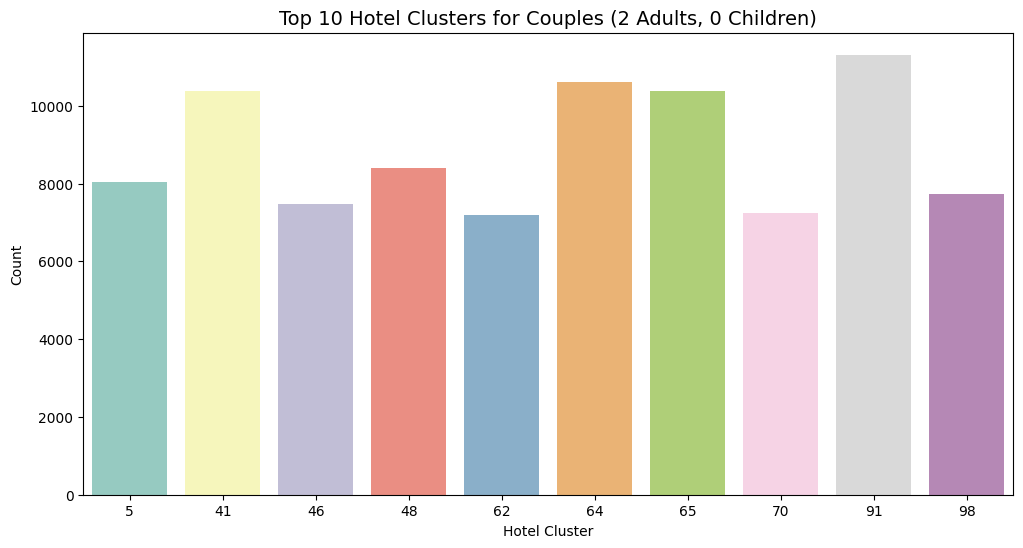

In [145]:
# Filter for exactly 2 adults and 0 children
pairs_df = df[(df['srch_adults_cnt'] == 2) & (df['srch_children_cnt'] == 0)]

# Get top 10 hotel clusters for this group
top_clusters_pairs = pairs_df['hotel_cluster'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_clusters_pairs.index, y=top_clusters_pairs.values, palette="Set3")
plt.title("Top 10 Hotel Clusters for Couples (2 Adults, 0 Children)", fontsize=14)
plt.xlabel("Hotel Cluster")
plt.ylabel("Count")
plt.show()


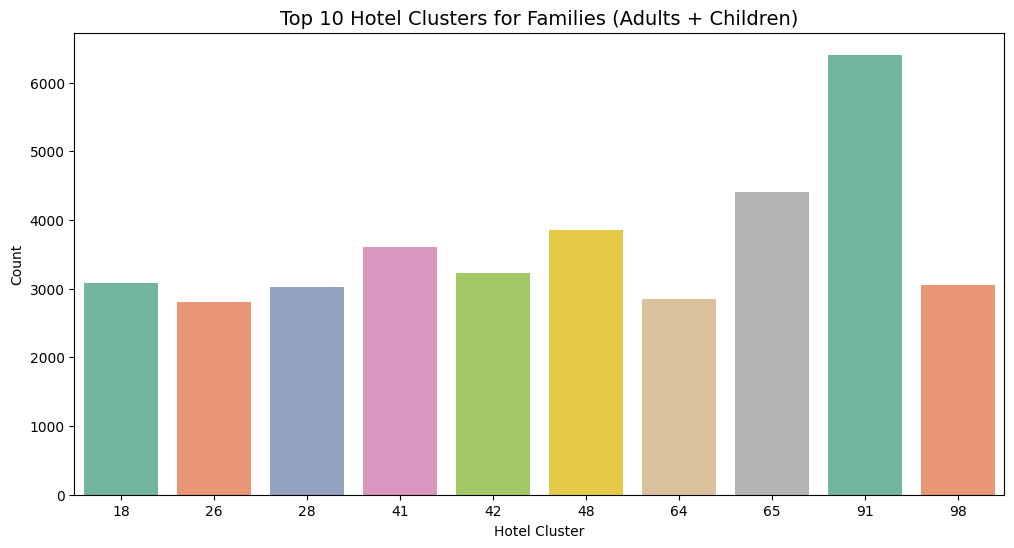

In [146]:
# Family = at least 2 adults and 1+ children
family_df = df[(df['srch_adults_cnt'] >= 2) & (df['srch_children_cnt'] > 0)]

# Top 10 hotel clusters
top_clusters_family = family_df['hotel_cluster'].value_counts().head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=top_clusters_family.index, y=top_clusters_family.values, palette="Set2")
plt.title("Top 10 Hotel Clusters for Families (Adults + Children)", fontsize=14)
plt.xlabel("Hotel Cluster")
plt.ylabel("Count")
plt.show()


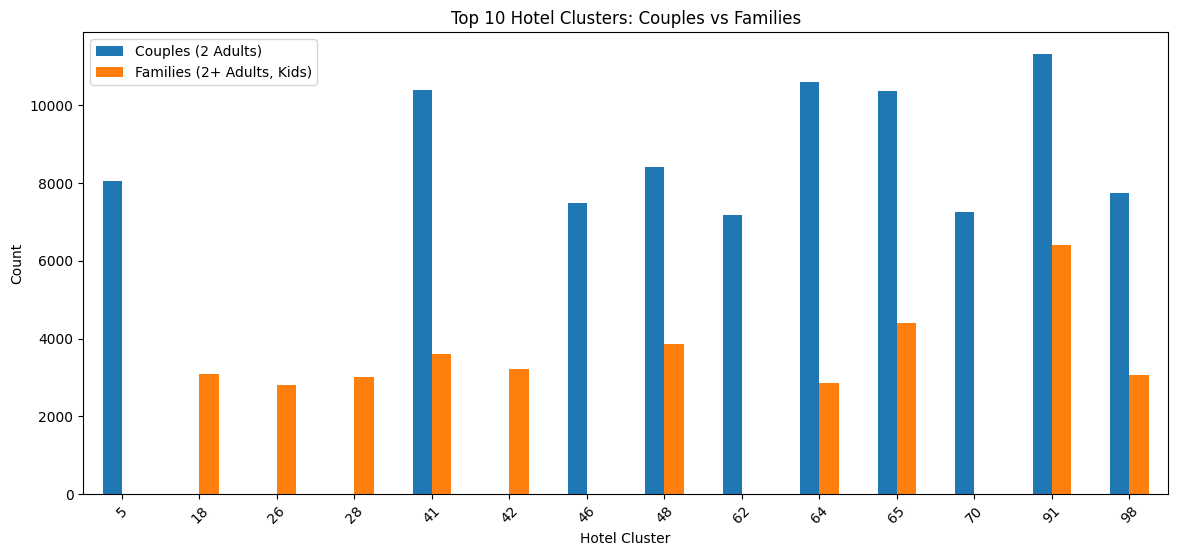

In [149]:
# Define groups
pairs_df   = df[(df['srch_adults_cnt'] == 2) & (df['srch_children_cnt'] == 0)]
family_df  = df[(df['srch_adults_cnt'] >= 2) & (df['srch_children_cnt'] > 0)]

# Count top clusters
pairs_counts  = pairs_df['hotel_cluster'].value_counts().head(10)
family_counts = family_df['hotel_cluster'].value_counts().head(10)

# Combine into DataFrame
compare_df = pd.DataFrame({
    'Couples (2 Adults)': pairs_counts,
    'Families (2+ Adults, Kids)': family_counts
}).fillna(0)

# Plot side by side
compare_df.plot(kind='bar', figsize=(14,6))
plt.title("Top 10 Hotel Clusters: Couples vs Families")
plt.ylabel("Count")
plt.xlabel("Hotel Cluster")
plt.xticks(rotation=45)
plt.legend()
plt.show()



In [154]:
# Couples only
pairs_df = df[(df['srch_adults_cnt'] == 2) & (df['srch_children_cnt'] == 0)]
pairs_country = pairs_df['user_location_country'].value_counts().reset_index()
pairs_country.columns = ['country', 'count_couples']

# Families
family_df = df[(df['srch_adults_cnt'] >= 2) & (df['srch_children_cnt'] > 0)]
family_country = family_df['user_location_country'].value_counts().reset_index()
family_country.columns = ['country', 'count_families']

# Merge together
compare_country = pd.merge(pairs_country, family_country, on='country', how='outer').fillna(0)

# Sort by total activity
compare_country['total'] = compare_country['count_couples'] + compare_country['count_families']
compare_country = compare_country.sort_values('total', ascending=False)


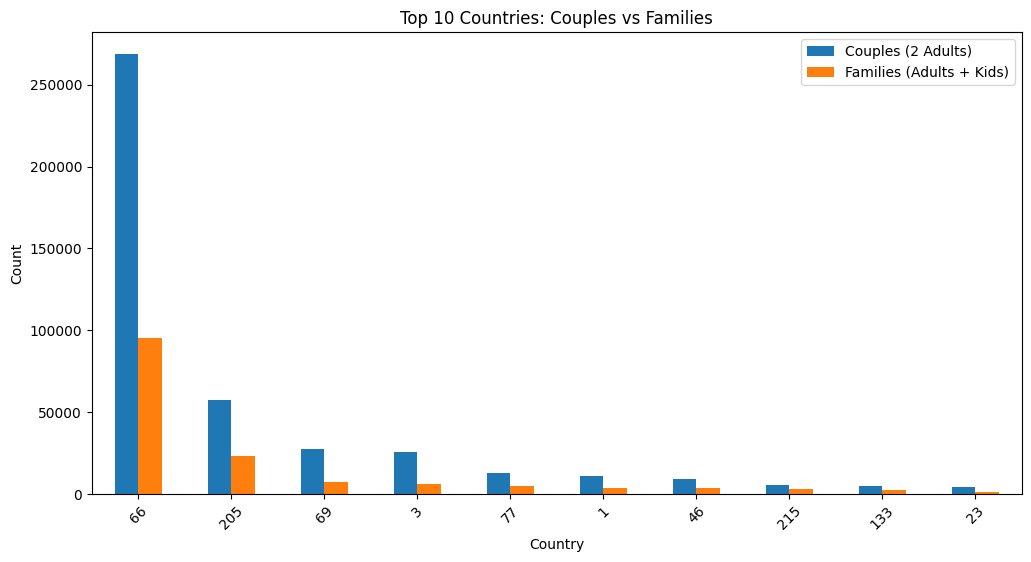

In [155]:
top_countries = compare_country.head(10)

top_countries.set_index('country')[['count_couples','count_families']].plot(
    kind='bar', figsize=(12,6)
)

plt.title("Top 10 Countries: Couples vs Families")
plt.ylabel("Count")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.legend(["Couples (2 Adults)", "Families (Adults + Kids)"])
plt.show()


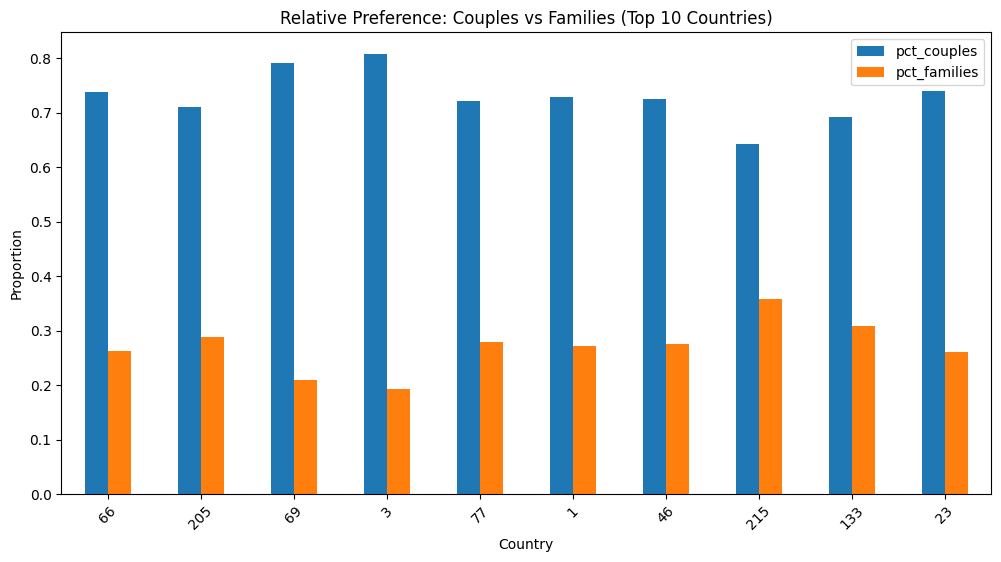

In [156]:
compare_country['pct_couples'] = compare_country['count_couples'] / compare_country['total']
compare_country['pct_families'] = compare_country['count_families'] / compare_country['total']

top_pct = compare_country.head(10)

top_pct.set_index('country')[['pct_couples','pct_families']].plot(
    kind='bar', figsize=(12,6)
)

plt.title("Relative Preference: Couples vs Families (Top 10 Countries)")
plt.ylabel("Proportion")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()


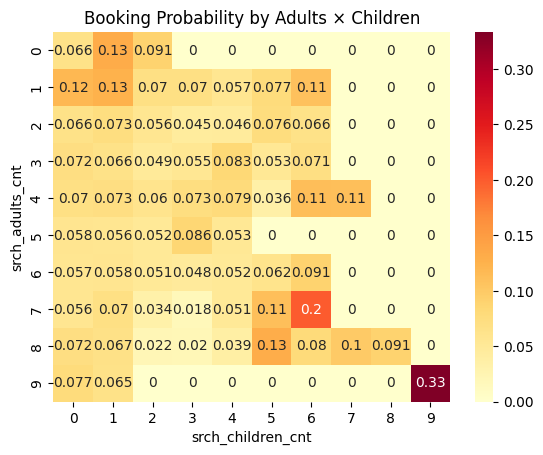

In [158]:
sns.heatmap(
    pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'], values=df['is_booking'], aggfunc='mean').fillna(0),
    cmap="YlOrRd", annot=True
)
plt.title("Booking Probability by Adults × Children")
plt.show()


# Multivariate

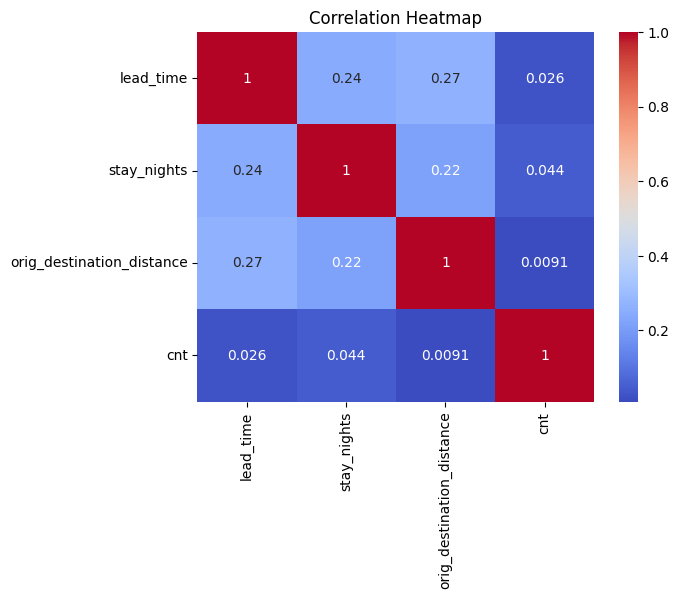

In [157]:
num_cols = ['lead_time','stay_nights','orig_destination_distance','cnt']
corr = df[num_cols].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [173]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0 2014-07-16 10:02:58          2               3                     66  \
1 2013-06-15 15:38:05         30               4                    195   
2 2014-11-23 17:06:12         30               4                    195   
3 2014-01-08 13:58:04          2               3                     66   
4 2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  hotel_continent hotel_country   
0      501          0           0  ...                2            50  \
1     1048          0           1  ...                0           185   
2     1048          0           0  ...                3           151   
3     1482          0           1  ...                2            50   
4     1482          0           0  ...                2            50   

  hotel_market  hotel_cluster  search_year  search_month  search_dayofweek   
0          675             10         2014             7                 2  \
1          185             58         2013             6                 5   
2           69              6         2014            11                 6   
3          680             95         2014             1                 2   
4          680             77         2014             1                 2   

   search_hour  lead_time  stay_nights  
0           10       15.0          1.0  
1           15       82.0          8.0  
2           17      214.0          2.0  
3           13       43.0          2.0  
4           14       44.0          5.0  

[5 rows x 30 columns]

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 964936 entries, 0 to 964935
Data columns (total 30 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   date_time                  964936 non-null  datetime64[ns]
 1   site_name                  964936 non-null  int64         
 2   posa_continent             964936 non-null  int64         
 3   user_location_country      964936 non-null  int64         
 4   user_location_region       964936 non-null  int64         
 5   user_location_city         964936 non-null  int64         
 6   orig_destination_distance  615975 non-null  float64       
 7   user_id                    964936 non-null  int64         
 8   is_mobile                  964936 non-null  int64         
 9   is_package                 964936 non-null  int64         
 10  channel                    964936 non-null  int64         
 11  srch_ci                    964936 non-null  datetime

In [172]:
df=df.drop(columns=['orig_dest_count'])

In [166]:
pivot = pd.crosstab(df['user_location_country'], df['hotel_country'])
pivot.head()


hotel_country          0    1    2    3    4     5    6    7    8    9    ...   
user_location_country                                                     ...   
0                        8    4    1    4    0   116    0    8   13    2  ...  \
1                       44    8    6    0   18    69    0  144  160    6  ...   
3                       20   26    2   60   14  1733    0  155  229    9  ...   
4                        0    0    0    0    0     0    0    0    3    0  ...   
5                        5    1    0    0    1     8    0   10   20    1  ...   

hotel_country          202  203   204  205  206  207  208  210  211  212  
user_location_country                                                     
0                        8   28   114    0    2    0   35    0    0    0  
1                        2   40  1622    2   28    0  651    0    8    7  
3                        6   31  2863    0    9    0  203    0    1    6  
4                        0    1     4    0    0    0    0    0    0    0  
5                        0    9    95    0    0    0   26    0    0    1  

[5 rows x 199 columns]

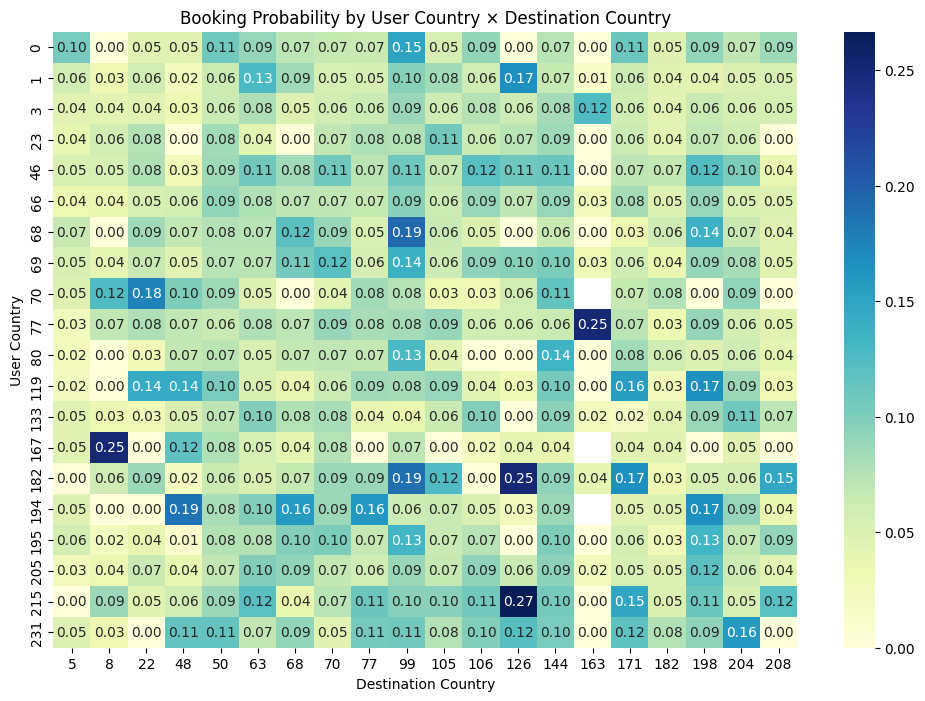

In [168]:

top_origins = df['user_location_country'].value_counts().head(20).index
top_destinations = df['hotel_country'].value_counts().head(20).index

subset = df[df['user_location_country'].isin(top_origins) & df['hotel_country'].isin(top_destinations)]
pivot = pd.crosstab(subset['user_location_country'], subset['hotel_country'], values=subset['is_booking'], aggfunc='mean')

plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="YlGnBu")
plt.title("Booking Probability by User Country × Destination Country")
plt.xlabel("Destination Country")
plt.ylabel("User Country")
plt.show()


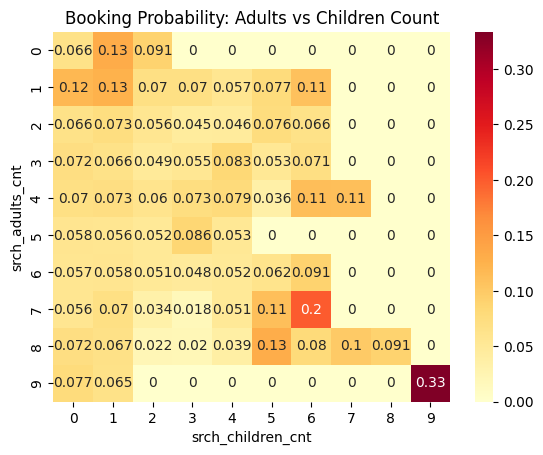

In [175]:
plt.figure()
sns.heatmap(pd.crosstab(df['srch_adults_cnt'], df['srch_children_cnt'], values=df['is_booking'], aggfunc='mean').fillna(0), cmap="YlOrRd", annot=True)
plt.title("Booking Probability: Adults vs Children Count")
plt.show()

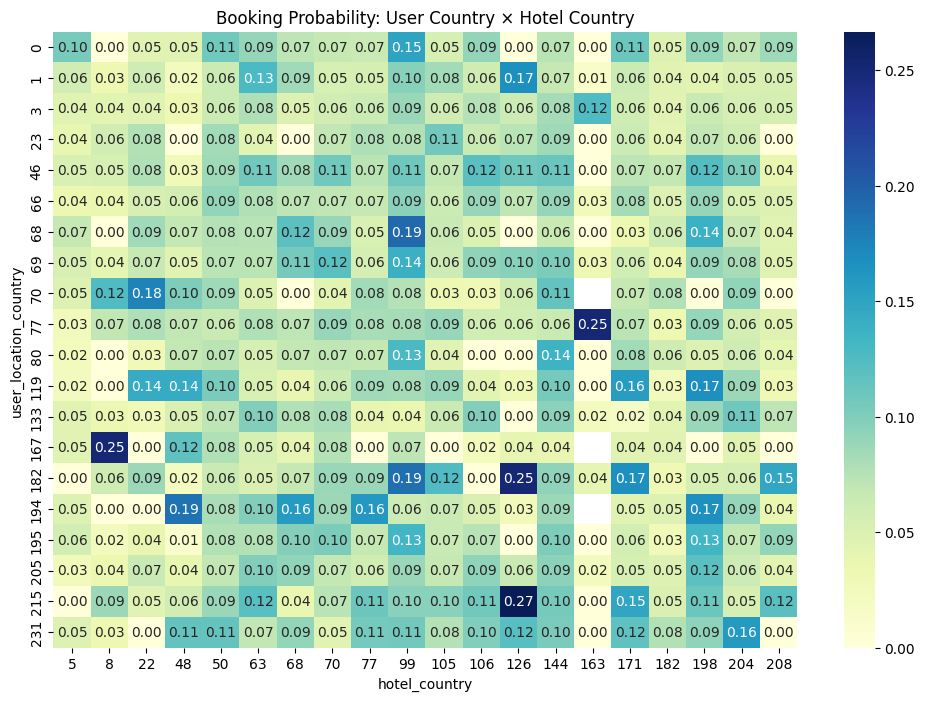

In [176]:
top_users = df['user_location_country'].value_counts().head(20).index
top_hotels = df['hotel_country'].value_counts().head(20).index
subset = df[df['user_location_country'].isin(top_users) & df['hotel_country'].isin(top_hotels)]
pivot = pd.crosstab(subset['user_location_country'], subset['hotel_country'], values=subset['is_booking'], aggfunc='mean')
plt.figure(figsize=(12,8))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title("Booking Probability: User Country × Hotel Country")
plt.show()

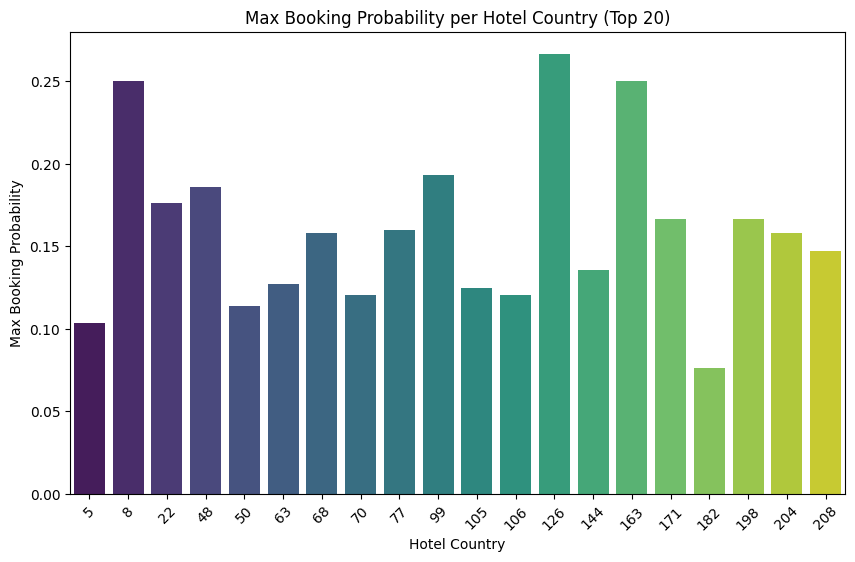

In [177]:
max_values = pivot.max(axis=0)  # axis=0 means column-wise max

# Plot histogram of these max values
plt.figure(figsize=(10,6))
sns.barplot(x=max_values.index, y=max_values.values, palette='viridis')
plt.xticks(rotation=45)
plt.ylabel("Max Booking Probability")
plt.xlabel("Hotel Country")
plt.title("Max Booking Probability per Hotel Country (Top 20)")
plt.show()

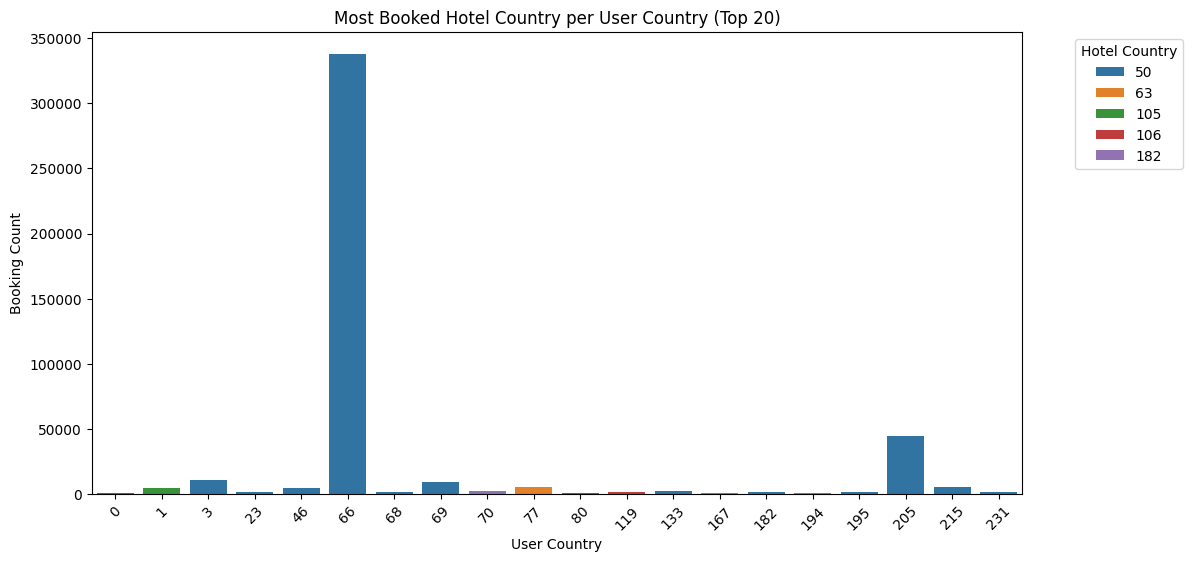

In [179]:

# Subset top 20 user and hotel countries
top_users = df['user_location_country'].value_counts().head(20).index
top_hotels = df['hotel_country'].value_counts().head(20).index
subset = df[df['user_location_country'].isin(top_users) & df['hotel_country'].isin(top_hotels)]

# Create a count table
count_table = pd.crosstab(subset['user_location_country'], subset['hotel_country'])

# Find the hotel country with max bookings for each user country
max_hotel = count_table.idxmax(axis=1)
max_count = count_table.max(axis=1)

# Create DataFrame for plotting
max_df = pd.DataFrame({
    'User_Country': max_hotel.index,
    'Top_Hotel_Country': max_hotel.values,
    'Booking_Count': max_count.values
})

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x='User_Country', y='Booking_Count', hue='Top_Hotel_Country', data=max_df, dodge=False)
plt.xticks(rotation=45)
plt.ylabel("Booking Count")
plt.xlabel("User Country")
plt.title("Most Booked Hotel Country per User Country (Top 20)")
plt.legend(title="Hotel Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


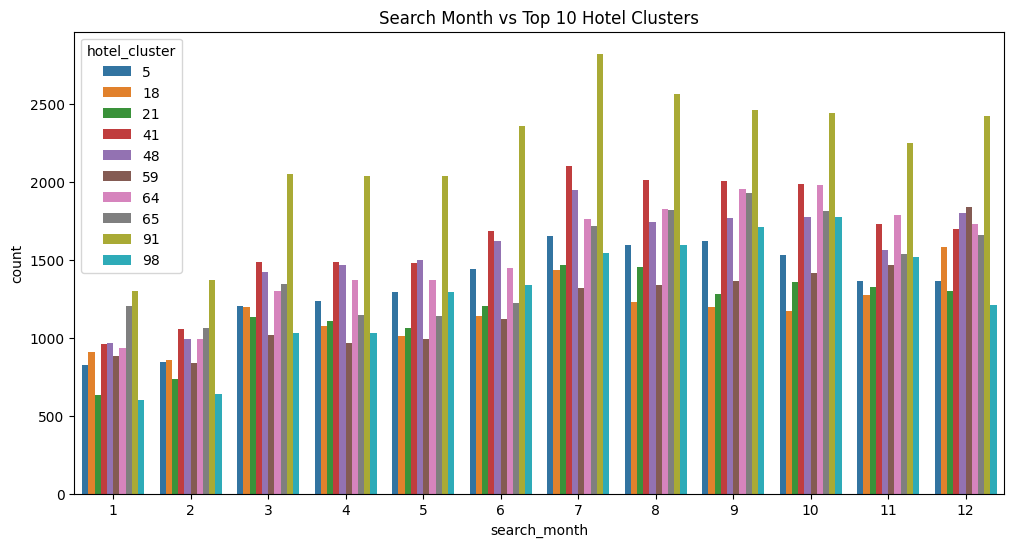

In [182]:
top_clusters = df['hotel_cluster'].value_counts().head(10).index
subset = df[df['hotel_cluster'].isin(top_clusters)]
plt.figure(figsize=(12,6))
sns.countplot(x='search_month', hue='hotel_cluster', data=subset, palette='tab10')
plt.title("Search Month vs Top 10 Hotel Clusters")
plt.show()

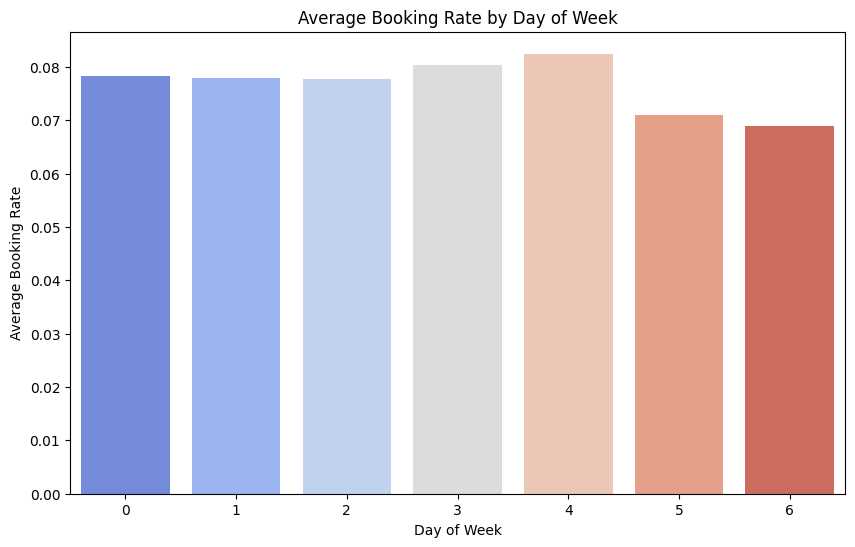

In [185]:
avg_booking_rate = df.groupby('search_dayofweek')['is_booking'].mean().reset_index()

# Plot as bar plot
plt.figure(figsize=(10,6))
sns.barplot(x='search_dayofweek', y='is_booking', data=avg_booking_rate, palette='coolwarm')
plt.xlabel("Day of Week")
plt.ylabel("Average Booking Rate")
plt.title("Average Booking Rate by Day of Week")
plt.show()


In [186]:
import plotly.express as px
import plotly.graph_objects as go

In [189]:
top_clusters = df['hotel_cluster'].value_counts().head(20).reset_index()
top_clusters.columns = ['hotel_cluster', 'count']  # rename columns

fig = px.bar(top_clusters,
             x='hotel_cluster',
             y='count',
             color='hotel_cluster',
             text='count',
             title='Top 20 Hotel Clusters')
fig.update_traces(textposition='outside')
fig.show()

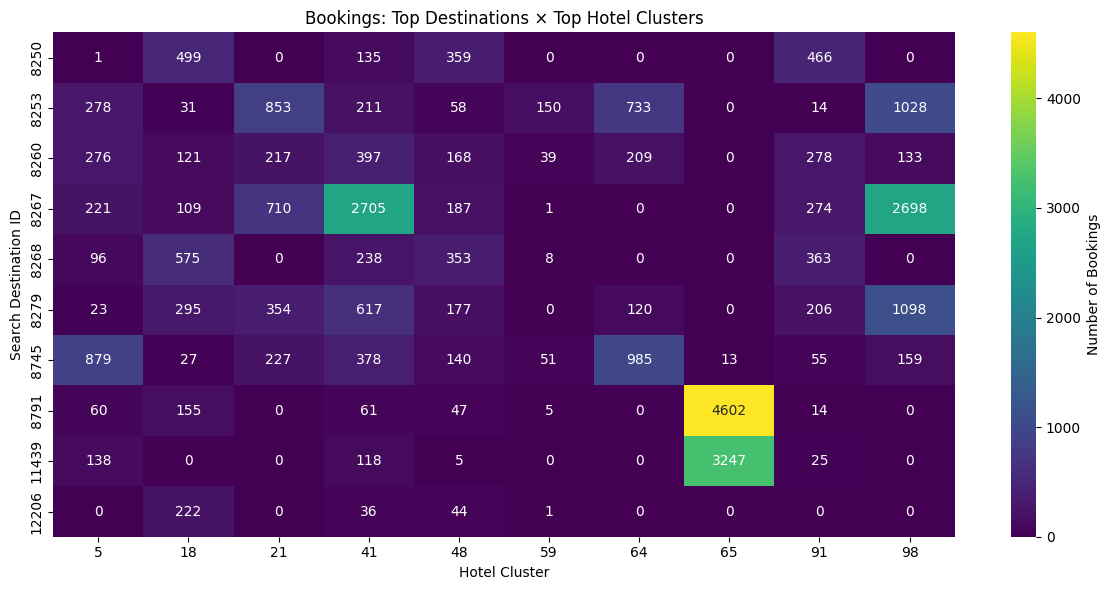

In [191]:
# Limit to top destinations and clusters for clarity
top_dest = df['srch_destination_id'].value_counts().head(10).index  # Fewer destinations (e.g., top 10)
top_clusters = df['hotel_cluster'].value_counts().head(10).index    # Fewer clusters (e.g., top 10)

subset = df[df['srch_destination_id'].isin(top_dest) & df['hotel_cluster'].isin(top_clusters)]
pivot = subset.groupby(['srch_destination_id', 'hotel_cluster'])['is_booking'].count().unstack(fill_value=0)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt='d', cmap='viridis', cbar_kws={'label': 'Number of Bookings'})
plt.xlabel("Hotel Cluster")
plt.ylabel("Search Destination ID")
plt.title("Bookings: Top Destinations × Top Hotel Clusters")
plt.tight_layout()
plt.show()


In [192]:
top_dest_per_origin = df[df['is_booking']==1].groupby('user_location_country')['hotel_country'].agg(lambda x:x.value_counts().index[0]).reset_index()
fig = px.bar(top_dest_per_origin.head(20), x='user_location_country', y='hotel_country', text='hotel_country',
             title='Most Popular Destination Country per User Country')
fig.show()

In [193]:
# Most popular hotel cluster per hotel country (bookings only)
top_cluster_per_country = df[df['is_booking']==1].groupby('hotel_country')['hotel_cluster'] \
                                .agg(lambda x: x.value_counts().index[0]).reset_index()

# Interactive bar chart
import plotly.express as px
fig = px.bar(top_cluster_per_country.head(20), 
             x='hotel_country', 
             y='hotel_cluster', 
             text='hotel_cluster',
             title='Most Popular Hotel Cluster per Hotel Country')
fig.update_traces(textposition='outside')
fig.show()


In [194]:

# Focus on bookings only
df_bookings = df[df['is_booking']==1]

# Select top 20 user countries by number of bookings
top_user_countries = df_bookings['user_location_country'].value_counts().head(20).index
subset = df_bookings[df_bookings['user_location_country'].isin(top_user_countries)]

# Group by user country and hotel cluster, count bookings
cluster_counts = subset.groupby(['user_location_country','hotel_cluster']).size().reset_index(name='count')

# Interactive stacked bar chart
fig = px.bar(cluster_counts, 
             x='user_location_country', 
             y='count', 
             color='hotel_cluster', 
             title='Hotel Cluster Popularity by User Country',
             text='count')
fig.update_traces(textposition='outside')
fig.show()


In [196]:
df['user_id'].nunique()

477419

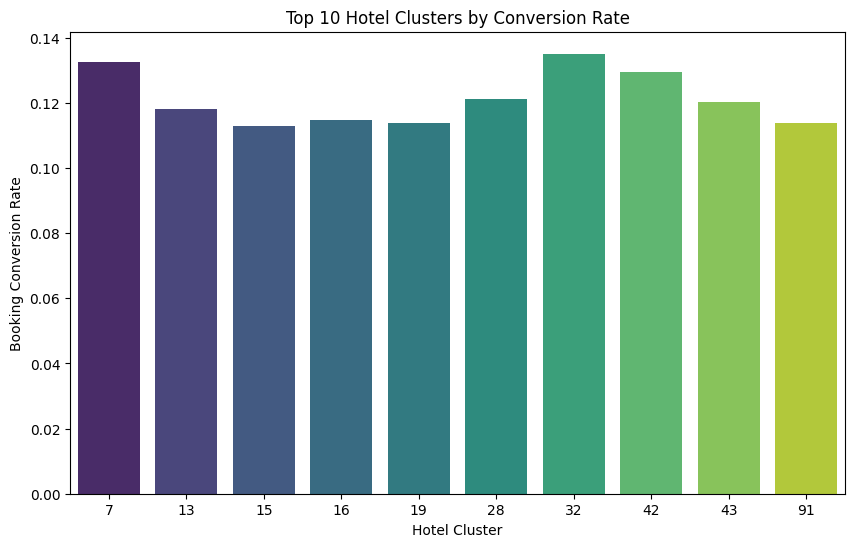

In [197]:
cluster_conv = df.groupby('hotel_cluster')['is_booking'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=cluster_conv.index, y=cluster_conv.values, palette="viridis")
plt.title("Top 10 Hotel Clusters by Conversion Rate")
plt.xlabel("Hotel Cluster")
plt.ylabel("Booking Conversion Rate")
plt.show()


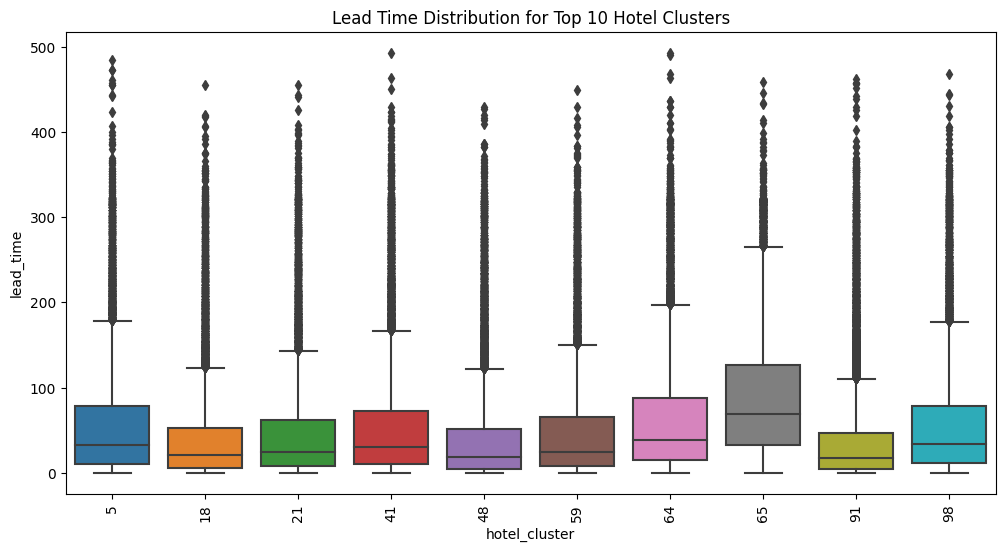

In [199]:
plt.figure(figsize=(12,6))
sns.boxplot(x='hotel_cluster', y='lead_time', data=df[df['hotel_cluster'].isin(df['hotel_cluster'].value_counts().head(10).index)])
plt.title("Lead Time Distribution for Top 10 Hotel Clusters")
plt.xticks(rotation=90)
plt.show()

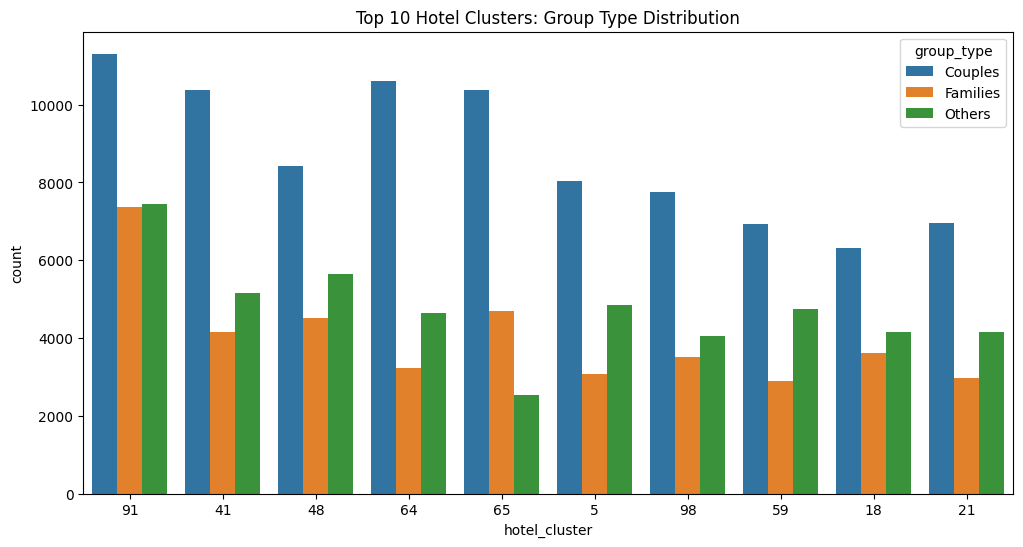

In [200]:
df['group_type'] = np.where((df['srch_adults_cnt'] == 2) & (df['srch_children_cnt'] == 0),
                            'Couples', 
                            np.where(df['srch_children_cnt'] > 0, 'Families', 'Others'))

top_clusters = df['hotel_cluster'].value_counts().head(10).index
subset = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(12,6))
sns.countplot(data=subset, x='hotel_cluster', hue='group_type', order=top_clusters)
plt.title("Top 10 Hotel Clusters: Group Type Distribution")
plt.show()


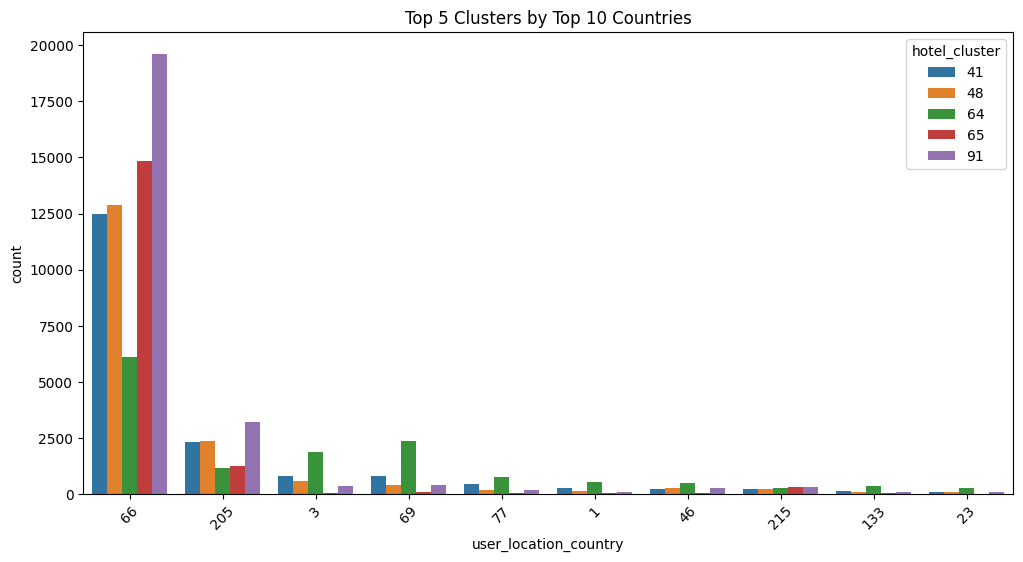

In [201]:
top_clusters = df['hotel_cluster'].value_counts().head(5).index
geo_subset = df[df['hotel_cluster'].isin(top_clusters)]

plt.figure(figsize=(12,6))
sns.countplot(data=geo_subset, x='user_location_country', hue='hotel_cluster',
              order=df['user_location_country'].value_counts().head(10).index)
plt.title("Top 5 Clusters by Top 10 Countries")
plt.xticks(rotation=45)
plt.show()


# User Behavior

## How Many Clusters Do Users Explore?

In [203]:
user_cluster_counts = df.groupby('user_id')['hotel_cluster'].nunique().reset_index()
user_cluster_counts.columns = ['user_id', 'unique_clusters']

fig = px.histogram(user_cluster_counts, x='unique_clusters', nbins=20,
                   title="How Many Hotel Clusters Do Users Explore?",
                   labels={'unique_clusters': 'Unique Hotel Clusters per User'},
                   template="plotly_white")
fig.show()


In [206]:
# Consider only bookings
df_bookings = df[df['is_booking'] == 1]

# Count unique clusters per user
user_cluster_loyalty = df_bookings.groupby('user_id')['hotel_cluster'].nunique().reset_index()
user_cluster_loyalty.columns = ['user_id', 'unique_clusters']


fig = px.histogram(user_cluster_loyalty, 
                   x='unique_clusters', 
                   nbins=30, 
                   title="How Many Unique Hotel Clusters Do Users Book?",
                   labels={'unique_clusters':'Number of Unique Clusters'},
                   color_discrete_sequence=['#1f77b4'])
fig.update_traces(marker=dict(line=dict(width=1, color='black')))
fig.show()

Massive spike at “1 unique cluster”

The majority of users only ever book from a single hotel cluster.

This suggests strong loyalty or consistent travel behavior.

Sharp drop after 2 clusters

A small fraction of users book from 2 different clusters.

Beyond that (3, 4, 5, 6 clusters), the numbers are negligible.

Long tail (tiny values after 2)

A very small subset of users is more “adventurous” and books across multiple clusters.

These are outliers compared to the loyal majority.

In [207]:
print("Average unique clusters per user:", user_cluster_loyalty['unique_clusters'].mean())
print("Median unique clusters per user:", user_cluster_loyalty['unique_clusters'].median())
print(user_cluster_loyalty['unique_clusters'].value_counts().head(10))

Average unique clusters per user: 1.1079968639749118
Median unique clusters per user: 1.0
unique_clusters
1    60260
2     5184
3      707
4      143
5       24
6        8
Name: count, dtype: int64


## What This Means

Most users are highly loyal: They repeatedly book hotels from the same cluster.

Cluster preferences are stable: Users don’t often switch between clusters, which means past booking behavior is a strong predictor of future bookings.

Recommendation insight:

A personalized recommender can focus on the last booked cluster for most users.

For the few “cluster hoppers,” recommendations should be broader (maybe a top-k set of clusters).

Business strategy:

### Loyal users → can be targeted with cluster-specific promotions.

### Hopping users → may benefit from exploratory offers or bundled packages.

In [208]:
# Step 1: compute unique clusters per user
df_bookings = df[df['is_booking'] == 1]
user_loyalty = df_bookings.groupby('user_id')['hotel_cluster'].nunique().reset_index()
user_loyalty.columns = ['user_id', 'unique_clusters']

# Step 2: add country info
user_country = df_bookings[['user_id', 'user_location_country']].drop_duplicates('user_id')
user_loyalty = user_loyalty.merge(user_country, on='user_id', how='left')

# Step 3: aggregate at country level (average clusters per user)
country_loyalty = user_loyalty.groupby('user_location_country')['unique_clusters'].mean().reset_index()

# Step 4: plot (top 20 countries by user count for clarity)
top_countries = df_bookings['user_location_country'].value_counts().head(20).index
fig = px.bar(country_loyalty[country_loyalty['user_location_country'].isin(top_countries)],
             x='user_location_country',
             y='unique_clusters',
             title='Average Number of Unique Hotel Clusters per User by Country',
             text='unique_clusters',
             color='unique_clusters',
             color_continuous_scale='Blues')
fig.update_traces(textposition='outside')
fig.show()


Countries with lower values (~1) → users are more loyal, sticking to one cluster.

Countries with higher values (>1.5) → users are exploratory, hopping across clusters.

This can reveal cultural or market-driven behavior:

Example: Business travelers (from certain countries) might be very loyal.

Tourist-heavy markets may explore more

In [209]:
# Step 1: filter actual bookings
df_bookings = df[df['is_booking'] == 1]

# Step 2: compute unique clusters per user
user_loyalty = df_bookings.groupby('user_id')['hotel_cluster'].nunique().reset_index()
user_loyalty.columns = ['user_id', 'unique_clusters']

# Step 3: attach booking type (take majority booking type per user)
user_package = df_bookings.groupby('user_id')['is_package'].agg(lambda x: x.mode()[0]).reset_index()
user_loyalty = user_loyalty.merge(user_package, on='user_id', how='left')

# Step 4: group by booking type
package_loyalty = user_loyalty.groupby('is_package')['unique_clusters'].mean().reset_index()

# Step 5: visualize
import plotly.express as px
fig = px.bar(package_loyalty,
             x='is_package',
             y='unique_clusters',
             text='unique_clusters',
             color='unique_clusters',
             title='Average Number of Unique Hotel Clusters per User: Package vs. Standalone',
             color_continuous_scale='Viridis')
fig.update_traces(textposition='outside')
fig.update_xaxes(tickvals=[0,1], ticktext=['Standalone','Package'])
fig.show()


### If package users have higher unique_clusters:
→ They hop across more clusters, suggesting exploratory travel (vacations, tours).

### If standalone users are more loyal (lower unique_clusters):
→ They stick to the same cluster, likely for business or consistent destinations.

# Loyalty Over Time

In [210]:
# Step 1: filter bookings only
df_bookings = df[df['is_booking'] == 1].copy()

# Step 2: sort bookings per user by date
df_bookings = df_bookings.sort_values(['user_id', 'date_time'])

# Step 3: cumulative unique clusters per user
df_bookings['cumulative_clusters'] = (
    df_bookings.groupby('user_id')['hotel_cluster']
    .transform(lambda x: x.expanding().apply(lambda s: s.nunique()))
)

# Step 4: calculate "booking number" for each user (1st booking, 2nd booking, etc.)
df_bookings['booking_number'] = df_bookings.groupby('user_id').cumcount() + 1

# Step 5: average loyalty trend across all users
loyalty_trend = df_bookings.groupby('booking_number')['cumulative_clusters'].mean().reset_index()

# Step 6: plot trend
fig = px.line(loyalty_trend, 
              x='booking_number', 
              y='cumulative_clusters', 
              title='How User Loyalty Changes Over Time (Booking Sequence)',
              markers=True)
fig.update_layout(yaxis_title='Avg. Unique Clusters per User', xaxis_title='Booking Number')
fig.show()


Users diversify over time: As people make more bookings, they try more clusters instead of sticking to just one.

Loyalty in this context means exploration vs. concentration:

If loyalty = sticking to the same cluster, then this chart suggests users are less loyal as they book more (since they spread across more clusters).

If loyalty = engagement with the platform overall, this shows loyalty increases because users keep coming back and trying new things.

👉 Essentially, this graph tells you that returning users are more likely to explore multiple clusters, rather than staying in the same one

# Loyality of user with standalone vs package

In [211]:
# Step 1: filter only bookings
df_bookings = df[df['is_booking'] == 1].copy()

# Step 2: sort bookings per user by date
df_bookings = df_bookings.sort_values(['user_id', 'date_time'])

# Step 3: cumulative unique clusters per user
df_bookings['cumulative_clusters'] = (
    df_bookings.groupby('user_id')['hotel_cluster']
    .transform(lambda x: x.expanding().apply(lambda s: s.nunique()))
)

# Step 4: assign booking sequence number per user
df_bookings['booking_number'] = df_bookings.groupby('user_id').cumcount() + 1

# Step 5: aggregate loyalty trend separately for package vs standalone
loyalty_trend_pkg = (
    df_bookings.groupby(['is_package', 'booking_number'])['cumulative_clusters']
    .mean()
    .reset_index()
)

# Step 6: plot
import plotly.express as px
fig = px.line(loyalty_trend_pkg, 
              x='booking_number', 
              y='cumulative_clusters', 
              color='is_package',
              markers=True,
              title='User Loyalty Over Time: Package vs Standalone')
fig.update_layout(
    yaxis_title='Avg. Unique Clusters per User',
    xaxis_title='Booking Number',
    legend_title='Booking Type'
)
fig.update_traces(mode="lines+markers")

# Rename legend labels
fig.for_each_trace(
    lambda t: t.update(name="Package" if t.name == "1" else "Standalone")
)
fig.show()


# Package Users Are Significantly More Loyal
The most important insight is the clear difference between the two lines:

The Package user line remains high as the number of bookings increases. This means a much larger proportion of users who book packages come back to make a 2nd, 3rd, 4th, etc., booking.

The Standalone user line drops off sharply after the first booking. This indicates that most users who book standalone items (like just a flight) are one-time customers and do not return.

Generating sample data...
Processing data...
Generating plot...


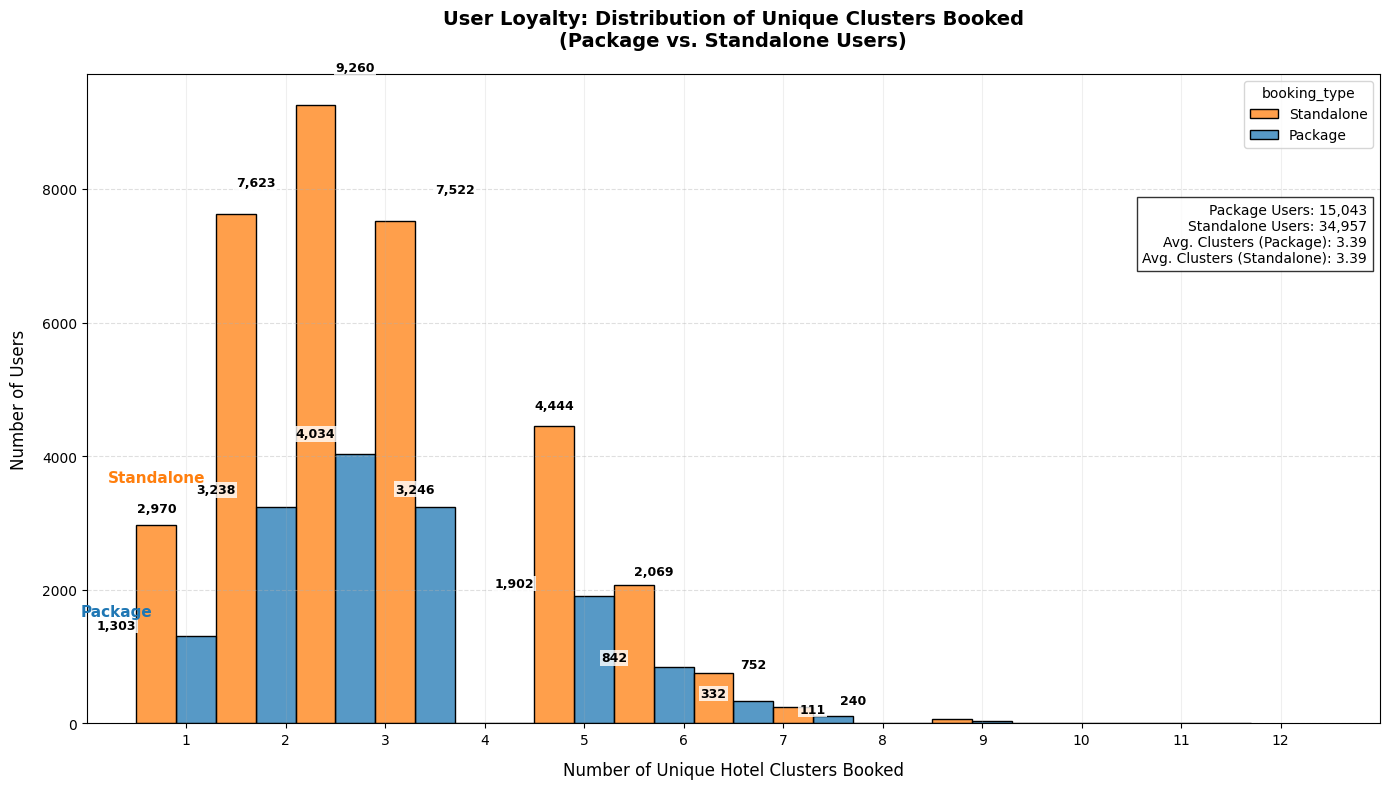


SUMMARY STATISTICS
                count      mean       std  min  25%  50%  75%   max
booking_type                                                       
Package       15043.0  3.387689  1.504790  1.0  2.0  3.0  4.0  11.0
Standalone    34957.0  3.393283  1.504762  1.0  2.0  3.0  4.0  12.0


In [219]:
#1. Generate Sample Data (Replace this with your actual DataFrame 'df')
print("Generating sample data...")
np.random.seed(42)  # For reproducibility
num_users = 50000

# Generate number of bookings for each user first
bookings_per_user = np.random.poisson(2.5, num_users) + 1  # At least 1 booking

# Create arrays with consistent lengths
user_ids = np.repeat(np.arange(1, num_users + 1), bookings_per_user)
package_flags = np.repeat(np.random.choice([0, 1], size=num_users, p=[0.7, 0.3]), bookings_per_user)
hotel_clusters = np.random.randint(1, 50, size=len(user_ids))

# Create DataFrame
data = {
    'user_id': user_ids,
    'is_package': package_flags,
    'hotel_cluster': hotel_clusters
}
df = pd.DataFrame(data)

# 2. Data Processing
print("Processing data...")
# Calculate unique clusters per user
user_unique_clusters = df.groupby('user_id')['hotel_cluster'].nunique().reset_index()
user_unique_clusters.rename(columns={'hotel_cluster': 'unique_cluster_count'}, inplace=True)

# Classify users: 'Package' if they have ever booked one, else 'Standalone'
user_booking_type = df.groupby('user_id')['is_package'].max().reset_index()
user_booking_type['booking_type'] = user_booking_type['is_package'].map({1: 'Package', 0: 'Standalone'})

# Merge the dataframes
plotting_df = user_unique_clusters.merge(user_booking_type[['user_id', 'booking_type']], on='user_id')

# 3. Create the Visualization
print("Generating plot...")
plt.figure(figsize=(14, 8))
ax = sns.histplot(
    data=plotting_df,
    x='unique_cluster_count',
    hue='booking_type',
    bins=range(1, plotting_df['unique_cluster_count'].max() + 2),
    binwidth=0.8,
    stat='count',
    common_norm=False,
    alpha=0.75,
    multiple='dodge',
    palette={'Package': '#1f77b4', 'Standalone': '#ff7f0e'}  # Explicit colors
)

# 4. Formatting and Styling
plt.xlabel('Number of Unique Hotel Clusters Booked', fontsize=12, labelpad=10)
plt.ylabel('Number of Users', fontsize=12, labelpad=10)
plt.title('User Loyalty: Distribution of Unique Clusters Booked\n(Package vs. Standalone Users)', 
          fontsize=14, fontweight='bold', pad=20)

# X-axis formatting
max_clusters = plotting_df['unique_cluster_count'].max()
plt.xticks(ticks=np.arange(1.5, max_clusters + 1.5, 1), 
           labels=np.arange(1, max_clusters + 1, 1))
plt.xlim(0.5, max_clusters + 1.5)

# Y-axis formatting - use linear scale for better interpretation
plt.grid(axis='y', alpha=0.4, linestyle='--')
plt.grid(axis='x', alpha=0.2)

# 5. Add Direct Labels to Bars (Crucial for Clarity)
# Find the maximum cluster value to label
max_cluster_to_label = min(8, max_clusters)

for cluster in range(1, max_cluster_to_label + 1):
    for i, btype in enumerate(['Package', 'Standalone']):
        subset = plotting_df[(plotting_df['unique_cluster_count'] == cluster) & 
                             (plotting_df['booking_type'] == btype)]
        count = len(subset)
        if count > 0:
            # Calculate x-position for dodged bars
            x_pos = cluster + (i * 0.4) - 0.2
            # Add the label
            ax.text(x=x_pos, y=count * 1.05, s=f'{count:,}',
                    ha='center', va='bottom', fontsize=9, fontweight='bold',
                    bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

# 6. Add colored labels for each booking type on the first bar
first_package = len(plotting_df[(plotting_df['unique_cluster_count'] == 1) & 
                               (plotting_df['booking_type'] == 'Package')])
first_standalone = len(plotting_df[(plotting_df['unique_cluster_count'] == 1) & 
                                  (plotting_df['booking_type'] == 'Standalone')])

ax.text(x=0.8, y=first_package * 1.2, s='Package', 
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='#1f77b4')
ax.text(x=1.2, y=first_standalone * 1.2, s='Standalone', 
        ha='center', va='bottom', fontsize=11, fontweight='bold', color='#ff7f0e')

# 7. Add Insight Annotations
# Calculate and highlight the loyalty crossover point
pkg_users = plotting_df[plotting_df['booking_type'] == 'Package']
sta_users = plotting_df[plotting_df['booking_type'] == 'Standalone']

crossover_point = None
for n in range(2, max_clusters + 1):
    count_pkg = len(pkg_users[pkg_users['unique_cluster_count'] >= n])
    count_sta = len(sta_users[sta_users['unique_cluster_count'] >= n])
    if count_pkg > count_sta:
        crossover_point = n
        break

if crossover_point:
    # Draw a vertical line and annotation
    ax.axvline(x=crossover_point - 0.5, color='red', linestyle=':', alpha=0.8, linewidth=2)
    ax.text(x=crossover_point, y=ax.get_ylim()[1] * 0.7, 
            s=f'Loyalty Crossover Point\n({crossover_point}+ clusters)',
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(facecolor='white', alpha=0.9, edgecolor='red', boxstyle='round,pad=0.5'))

# 8. Add Statistics Box
stats_text = (
    f"Package Users: {len(pkg_users):,}\n"
    f"Standalone Users: {len(sta_users):,}\n"
    f"Avg. Clusters (Package): {pkg_users['unique_cluster_count'].mean():.2f}\n"
    f"Avg. Clusters (Standalone): {sta_users['unique_cluster_count'].mean():.2f}"
)
plt.gcf().text(0.98, 0.7, stats_text, fontsize=10, 
               bbox=dict(facecolor='white', alpha=0.8), 
               ha='right', va='center')

plt.tight_layout()
plt.show()

# 9. Print Summary Statistics
print("\n" + "="*50)
print("SUMMARY STATISTICS")
print("="*50)
print(plotting_df.groupby('booking_type')['unique_cluster_count'].describe())

if crossover_point:
    print(f"\nLoyalty Crossover occurs at {crossover_point}+ clusters")
    print(f"Package users with {crossover_point}+ clusters: {len(pkg_users[pkg_users['unique_cluster_count'] >= crossover_point]):,}")
    print(f"Standalone users with {crossover_point}+ clusters: {len(sta_users[sta_users['unique_cluster_count'] >= crossover_point]):,}")

In [4]:
df['is_booking'].value_counts()

is_booking
0    920550
1     79450
Name: count, dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 24 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   date_time                  1000000 non-null  object 
 1   site_name                  1000000 non-null  int64  
 2   posa_continent             1000000 non-null  int64  
 3   user_location_country      1000000 non-null  int64  
 4   user_location_region       1000000 non-null  int64  
 5   user_location_city         1000000 non-null  int64  
 6   orig_destination_distance  641506 non-null   float64
 7   user_id                    1000000 non-null  int64  
 8   is_mobile                  1000000 non-null  int64  
 9   is_package                 1000000 non-null  int64  
 10  channel                    1000000 non-null  int64  
 11  srch_ci                    998731 non-null   object 
 12  srch_co                    998731 non-null   object 
 13  srch_adults_c

In [6]:
df.head()

date_time  site_name  posa_continent  user_location_country   
0  2014-07-16 10:02:58          2               3                     66  \
1  2013-06-15 15:38:05         30               4                    195   
2  2014-11-23 17:06:12         30               4                    195   
3  2014-01-08 13:58:04          2               3                     66   
4  2014-01-08 14:15:40          2               3                     66   

   user_location_region  user_location_city  orig_destination_distance   
0                   189               10067                        NaN  \
1                   548               56440                        NaN   
2                   991               47725                        NaN   
3                   462               41898                  2454.8588   
4                   462               41898                  2455.2272   

   user_id  is_mobile  is_package  ...  srch_children_cnt srch_rm_cnt   
0      501          0           0  ...                  0           1  \
1     1048          0           1  ...                  0           1   
2     1048          0           0  ...                  0           1   
3     1482          0           1  ...                  0           2   
4     1482          0           0  ...                  0           1   

  srch_destination_id  srch_destination_type_id  is_booking  cnt   
0                8267                         1           0    1  \
1                1385                         1           1    1   
2                8803                         1           0    1   
3               12009                         1           0    1   
4               28494                         6           0    4   

   hotel_continent  hotel_country  hotel_market  hotel_cluster  
0                2             50           675             10  
1                0            185           185             58  
2                3            151            69              6  
3                2             50           680             95  
4                2             50           680             77  

[5 rows x 24 columns]